<h1>Day 1</h1>

In [1]:
# read data
import re

myfile = open("data\day1.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day1 = contents.split('\n')

for i in range(len(day1)):
    day1[i]=int(day1[i])

myfile = open("data\day1_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day1_ex = contents.split('\n')

for i in range(len(day1_ex)):
    day1_ex[i]=int(day1_ex[i])

day1_ex
len(day1_ex)
for i in range(len(day1_ex)):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [2]:
# solution day1 - part 1
def increase_sea_level(ls):
    step = 0
    for i in range(1, len(ls)):
        if ls[i] >= ls[i-1]:
            step+=1
    return step

print(increase_sea_level(day1_ex))
print(increase_sea_level(day1))
# solution day1 - part 2

def increase_sea_level_2(ls):
    step = 0
    sm_before = ls[0] + ls[1] + ls[2]
    for i in range(1, len(ls)-2):
        sm_new = ls[i] + ls[i+1] + ls[i+2]
        if sm_new > sm_before:
            step+=1
        sm_before = sm_new
    return step

print(increase_sea_level_2(day1_ex))
print(increase_sea_level_2(day1))


7
1446
5
1486


<h1>Day 2</h1>

In [3]:
# read data
import re

myfile = open("data\day2.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day2 = contents.split('\n')

for i in range(len(day2)):
    day2[i]=day2[i].split()

myfile = open("data\day2_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day2_ex = contents.split('\n')

for i in range(len(day2_ex)):
    day2_ex[i]=day2_ex[i].split()

In [4]:
# solution day2 - part 1

def go_sub(ls):
    horz = 0
    deph = 0
    for s in ls:
        if s[0] == 'forward':
            horz+=int(s[1])
        if s[0] == 'down':
            deph+=int(s[1])
        if s[0] == 'up':
            deph-=int(s[1])
    return horz*deph

print(go_sub(day2_ex))
print(go_sub(day2))


# solution day2 - part 2

def go_sub_2(ls):
    aim = 0
    horz = 0
    deph = 0
    for s in ls:
        if s[0] == 'forward':
            horz+=int(s[1])
            deph+=int(s[1])*aim
        if s[0] == 'down':
            aim+=int(s[1])
        if s[0] == 'up':
            aim-=int(s[1])
    return horz*deph

print(go_sub_2(day2_ex))
print(go_sub_2(day2))



150
1427868
900
1568138742


<h1>Day 3 </h1>

In [5]:
# read data

myfile = open("data\day3.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day3 = contents.split('\n')

myfile = open("data\day3_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day3_ex = contents.split('\n')

In [6]:
import math

def gamma_epsilon(ls):
    gamma = []
    epsilon = []
    for i in range(len(ls[0])):
        zero = 0
        one = 0
        for j in range(len(ls)):
            if ls[j][i] == '0':
                zero+=1
            if ls[j][i] == '1':
                one+=1
        if zero > one:
            gamma.append(0)
            epsilon.append(1)
        if one > zero:
            gamma.append(1)
            epsilon.append(0)
    return gamma, epsilon


def bin_to_num(ls):
    num = 0
    for i in range(len(ls)):
        num+=int(ls[len(ls)-1-i])*math.pow(2,i)
    return num


gamma, epsilon = gamma_epsilon(day3_ex)
print(bin_to_num(gamma)*bin_to_num(epsilon))

gamma, epsilon = gamma_epsilon(day3)
print(bin_to_num(gamma)*bin_to_num(epsilon))

198.0
4191876.0


In [7]:

def find_o2(ls, step):
    if len(ls) == 1:
        return ls[0]
    zero = 0
    one = 0
    for i in range(len(ls)):
        if ls[i][step] == '0':
            zero+=1
        if ls[i][step] == '1':
            one+=1
    if zero > one:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '0':
                ls_new.append(ls[i])
        return find_o2(ls_new, step+1)
    if one >= zero:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '1':
                ls_new.append(ls[i])
        return find_o2(ls_new, step+1)


def find_co2(ls, step):
    if len(ls) == 1:
        return ls[0]
    zero = 0
    one = 0
    for i in range(len(ls)):
        if ls[i][step] == '0':
            zero+=1
        if ls[i][step] == '1':
            one+=1
    if zero <= one:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '0':
                ls_new.append(ls[i])
        return find_co2(ls_new, step+1)
    if one < zero:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '1':
                ls_new.append(ls[i])
        return find_co2(ls_new, step+1)
    
print(find_o2(day3_ex, 0))
print(find_co2(day3_ex, 0))

print(bin_to_num(find_o2(day3_ex, 0))*bin_to_num(find_co2(day3_ex, 0)))

print(find_o2(day3, 0))
print(find_co2(day3, 0))

print(bin_to_num(find_o2(day3, 0))*bin_to_num(find_co2(day3, 0)))

10111
01010
230.0
010101101111
100110010111
3414905.0


<h1>Day 4</h1>

In [8]:
# read data

myfile = open("data\day4.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4 = contents.split('\n\n')
role_numbers = day4[0].split(',')
boards = []
for board in day4[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards.append(sp_brd)

role_numbers
boards


myfile = open("data\day4_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4_ex = contents.split('\n\n')
role_numbers_ex = day4_ex[0].split(',')
boards_ex = []
for board in day4_ex[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards_ex.append(sp_brd)

role_numbers_ex
boards_ex

[[['22', '13', '17', '11', '0'],
  ['8', '2', '23', '4', '24'],
  ['21', '9', '14', '16', '7'],
  ['6', '10', '3', '18', '5'],
  ['1', '12', '20', '15', '19']],
 [['3', '15', '0', '2', '22'],
  ['9', '18', '13', '17', '5'],
  ['19', '8', '7', '25', '23'],
  ['20', '11', '10', '24', '4'],
  ['14', '21', '16', '12', '6']],
 [['14', '21', '17', '24', '4'],
  ['10', '16', '15', '9', '19'],
  ['18', '8', '23', '26', '20'],
  ['22', '11', '13', '6', '5'],
  ['2', '0', '12', '3', '7']]]

In [9]:
def bingo(role_numbers, boards):
    lsij = []
    for borad in boards:
        i5 = []
        j5 = []
        for i in range(5):     
            i5.append(0)
            j5.append(0)
        lsij.append({'i5':i5,'j5':j5})
    for num in role_numbers:
        for k in range(len(boards)):
            for i in range(5):
                for j in range(5):
                    if boards[k][i][j] == num:
                        boards[k][i][j] = 0
                        lsij[k]['i5'][i]+=1
                        lsij[k]['j5'][j]+=1
                        if lsij[k]['j5'][j] == 5 or lsij[k]['i5'][i] == 5:
                            print('BINGO!!!')
                            return boards[k], num

winning_board_ex, last_number_ex = bingo(role_numbers_ex, boards_ex)
sm_ex=0
for i in range(5):
    for j in range(5):
        sm_ex+=int(winning_board_ex[i][j])

print(sm_ex*int(last_number_ex))


winning_board, last_number = bingo(role_numbers, boards)
sm=0
for i in range(5):
    for j in range(5):
        sm+=int(winning_board[i][j])

print(sm_ex*int(last_number))

BINGO!!!
4512
BINGO!!!
9024


In [10]:
# read data

myfile = open("data\day4.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4 = contents.split('\n\n')
role_numbers = day4[0].split(',')
boards = []
for board in day4[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards.append(sp_brd)

role_numbers
boards


myfile = open("data\day4_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4_ex = contents.split('\n\n')
role_numbers_ex = day4_ex[0].split(',')
boards_ex = []
for board in day4_ex[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards_ex.append(sp_brd)


def bingo_lose(role_numbers, boards):
    ls_idx=[]
    lsij = []
    for borad in boards:
        ls_idx.append(0)
        i5 = []
        j5 = []
        for i in range(5):     
            i5.append(0)
            j5.append(0)
        lsij.append({'i5':i5,'j5':j5})
    for num in role_numbers:
        for k in range(len(boards)):
            for i in range(5):
                for j in range(5):
                    if boards[k][i][j] == num:
                        boards[k][i][j] = 0
                        lsij[k]['i5'][i]+=1
                        lsij[k]['j5'][j]+=1
                        if (lsij[k]['j5'][j] == 5 or lsij[k]['i5'][i] == 5) and ls_idx[k]==0:
                            ls_idx[k]=1
                            remember_idx=k
        if sum(ls_idx) == len(boards):
            return boards[remember_idx], num


lose_board_ex, last_number_ex = bingo_lose(role_numbers_ex, boards_ex)
print(lose_board_ex, last_number_ex)
sm_ex=0
for i in range(5):
    for j in range(5):
        sm_ex+=int(lose_board_ex[i][j])

print(sm_ex*int(last_number_ex))


lose_board, last_number = bingo_lose(role_numbers, boards)
sm=0
for i in range(5):
    for j in range(5):
        sm+=int(lose_board[i][j])

print(sm*int(last_number))



[['3', '15', 0, 0, '22'], [0, '18', 0, 0, 0], ['19', '8', 0, '25', 0], ['20', 0, 0, 0, 0], [0, 0, 0, '12', '6']] 13
1924
1827


<h1>Day 5</h1>

In [11]:
# read data

myfile = open("data\day5.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day5 = contents.split('\n')

ls_xy = []
for xy in day5:
    vects = xy.split(' -> ')
    xy1 = vects[0].split(',')
    xy2 = vects[1].split(',')
    ls_xy.append(
        {
            'x1':int(xy1[0]),
            'y1':int(xy1[1]),
            'x2':int(xy2[0]),
            'y2':int(xy2[1]),
        }
    )


myfile = open("data\day5_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day5_ex = contents.split('\n')

ls_xy_ex = []
for xy in day5_ex:
    vects = xy.split(' -> ')
    xy1 = vects[0].split(',')
    xy2 = vects[1].split(',')
    ls_xy_ex.append(
        {
            'x1':int(xy1[0]),
            'y1':int(xy1[1]),
            'x2':int(xy2[0]),
            'y2':int(xy2[1]),
        }
    )
 

In [12]:
# puzzle 1
def rows_vens(ls_xy, n):
    mp = []
    for i in range(n):
        m = []
        for j in range(n):
            m.append(0)
        mp.append(m)
    for rw in ls_xy:
        if rw['x1'] == rw['x2']:
            for i in range(rw['y1'],rw['y2']+1):
                mp[rw['x1']][i]+=1
            for i in range(rw['y2'],rw['y1']+1):
                mp[rw['x1']][i]+=1
        if rw['y1'] == rw['y2']:
            for i in range(rw['x1'],rw['x2']+1):
                mp[i][rw['y1']]+=1
            for i in range(rw['x2'],rw['x1']+1):
                mp[i][rw['y1']]+=1
    return mp


mp_ex = rows_vens(ls_xy_ex, 10)
sm_ex = 0
for i in range(len(mp_ex)):
    for j in range(len(mp_ex[0])):
        if mp_ex[i][j]>=2:
            sm_ex+=1
sm_ex

mp = rows_vens(ls_xy, 1000)
sm = 0
for i in range(len(mp)):
    for j in range(len(mp[0])):
        if mp[i][j]>=2:
            sm+=1
sm

6666

In [13]:
# puzzle 2
def all_vens(ls_xy, n):
    mp = []
    for i in range(n):
        m = []
        for j in range(n):
            m.append(0)
        mp.append(m)
    for rw in ls_xy:
        if rw['x1'] == rw['x2']:
            for i in range(rw['y1'],rw['y2']+1):
                mp[rw['x1']][i]+=1
            for i in range(rw['y2'],rw['y1']+1):
                mp[rw['x1']][i]+=1
        if rw['y1'] == rw['y2']:
            for i in range(rw['x1'],rw['x2']+1):
                mp[i][rw['y1']]+=1
            for i in range(rw['x2'],rw['x1']+1):
                mp[i][rw['y1']]+=1
        if rw['x1'] != rw['x2'] and rw['y1'] != rw['y2']:
            m = (rw['y1'] - rw['y2'])/(rw['x1'] - rw['x2'])
            n = rw['y1'] - (rw['x1']*m)
            if m == 1:
                if rw['x1'] < rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x1'] + i][rw['y1'] + i]+=1
                if rw['x1'] > rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x2'] + i][rw['y2'] + i]+=1
            if m == -1:
                if rw['x1'] < rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x1'] + i][rw['y1'] - i]+=1
                if rw['x1'] > rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x2'] + i][rw['y2'] - i]+=1
            
    return mp

mp_ex = all_vens(ls_xy_ex, 10)

sm_ex = 0
for i in range(len(mp_ex)):
    for j in range(len(mp_ex[0])):
        if mp_ex[i][j]>=2:
            sm_ex+=1
mp = all_vens(ls_xy, 1000)
sm = 0
for i in range(len(mp)):
    for j in range(len(mp[0])):
        if mp[i][j]>=2:
            sm+=1

print(sm_ex)
print(sm)


12
19081


<h1>Day 6</h1>

In [14]:
# read data

myfile = open("data\day6.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6 = contents.split(',')
for i in range(len(day6)):
    day6[i]=int(day6[i])

myfile = open("data\day6_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6_ex = contents.split(',')
for i in range(len(day6_ex)):
    day6_ex[i]=int(day6_ex[i])


In [15]:
# puzzle 1
# read data

myfile = open("data\day6.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6 = contents.split(',')
for i in range(len(day6)):
    day6[i]=int(day6[i])

myfile = open("data\day6_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6_ex = contents.split(',')
for i in range(len(day6_ex)):
    day6_ex[i]=int(day6_ex[i])


def num_lanternfish(ls, days):
    for day in range(days):
        for i in range(len(ls)):
            ls[i]-= 1
            if ls[i] == -1:
                ls[i] = 6
                ls.append(8)
        print(len(ls))
    return len(ls)

print(num_lanternfish(day6_ex, 80))
print(num_lanternfish(day6, 80))

5
6
7
9
10
10
10
10
11
12
15
17
19
20
20
21
22
26
29
34
37
39
41
42
47
51
60
66
73
78
81
88
93
107
117
133
144
154
166
174
195
210
240
261
287
310
328
361
384
435
471
527
571
615
671
712
796
855
962
1042
1142
1242
1327
1467
1567
1758
1897
2104
2284
2469
2709
2894
3225
3464
3862
4181
4573
4993
5363
5934
5934
300
509
538
557
578
600
600
600
809
838
1066
1116
1157
1178
1200
1409
1438
1875
1954
2223
2294
2357
2587
2638
3284
3392
4098
4248
4580
4881
4995
5871
6030
7382
7640
8678
9129
9575
10752
11025
13253
13670
16060
16769
18253
19881
20600
24005
24695
29313
30439
34313
36650
38853
43886
45295
53318
55134
63626
67089
73166
80536
84148
97204
100429
116944
122223
136792
147625
157314
177740
184577
214148
222652
253736
269848
294106
325365
341891
391888
391888


<AxesSubplot:>

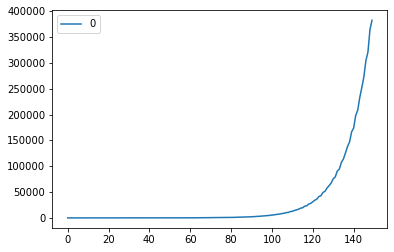

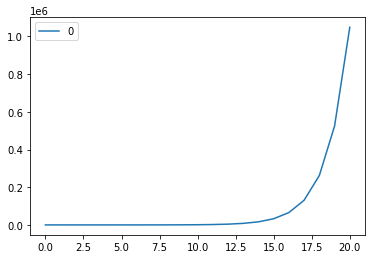

In [16]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def num_lanternfish_plot_one(ls, days):
    lss = []
    for day in range(days):
        for i in range(len(ls)):
            ls[i]-= 1
            if ls[i] == -1:
                ls[i] = 6
                ls.append(8)
        lss.append(len(ls))
    pd.DataFrame(lss).plot()

num_lanternfish_plot_one([6],150)

lss = []
for i in range(int(150/7)):
    lss.append(math.pow(2,i))
pd.DataFrame(lss).plot()


In [16]:
# puzzle 2
# read data

myfile = open("data\day6.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6 = contents.split(',')
for i in range(len(day6)):
    day6[i]=int(day6[i])

myfile = open("data\day6_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6_ex = contents.split(',')
for i in range(len(day6_ex)):
    day6_ex[i]=int(day6_ex[i])


def num_lanternfish_scale(ls, days):
    int_dic = {
        0:0,
        1:0,
        2:0,
        3:0,
        4:0,
        5:0,
        6:0,
        7:0,
        8:0,
    }
    for lanter in ls:
        int_dic[lanter]+=1
    for day in range(days):
        save8 = int_dic[0]
        for i in range(1,9):
            int_dic[i-1] = int_dic[i]
        int_dic[8] = save8
        int_dic[6]+= save8
    return int_dic

final_dic_ex = num_lanternfish_scale(day6_ex,256)
sm_ex = 0
for i in range(9):
    sm_ex+=final_dic_ex[i]
print(sm_ex)

final_dic = num_lanternfish_scale(day6,256)
sm = 0
for i in range(9):
    sm+=final_dic[i]
print(sm)



26984457539
1754597645339


<h1>Day 7</h1>

In [18]:
myfile = open("data\day7.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day7 = contents.split(',')
for i in range(len(day7)):
    day7[i] = int(day7[i])

myfile = open("data\day7_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day7_ex = contents.split(',')
for i in range(len(day7_ex)):
    day7_ex[i] = int(day7_ex[i])
day7_ex



[16, 1, 2, 0, 4, 2, 7, 1, 2, 14]

In [19]:
import numpy as np

arr = np.array(day7)

sum(abs(arr - np.median(arr)))


349769.0

In [20]:
import math
arr = np.array(day7)

arr_final = abs(arr - math.floor(arr.mean()))

sm1 = 0
for num in arr_final:
    sm1+=sum(range(num+1))

arr_final = abs(arr - math.ceil(arr.mean()))

sm2 = 0
for num in arr_final:
    sm2+=sum(range(num+1))

min(sm1, sm2)


99540554

In [21]:
import matplotlib.pyplot as plt
import math
import pandas as pd
ls = []

for i in range(1000):
    arr = np.array(day7)
    arr_final = abs(arr - i)
    sm = 0
    for num in arr_final:
        sm+=sum(range(num+1))
    ls.append({'num': i, 'sm' : sm})

df = pd.DataFrame(ls)

<AxesSubplot:>

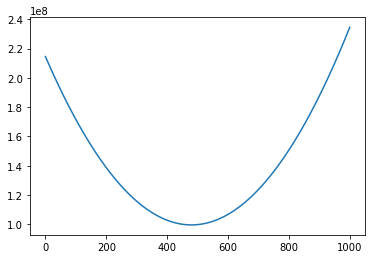

In [22]:
df.sm.plot()

<h1>Day 8</h1>

In [23]:
myfile = open("data\day8.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day8 = contents.split('\n')
ls8 = []
for i in range(len(day8)):
    spl = day8[i].split(' | ')
    ls8.append({
        'values':spl[0].split(' '),
        'targets':spl[1].split(' '),
    })
ls8   

myfile = open("data\day8_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day8_ex = contents.split('\n')
ls8_ex = []
for i in range(len(day8_ex)):
    spl = day8_ex[i].split(' | ')
    ls8_ex.append({
        'values':spl[0].split(' '),
        'targets':spl[1].split(' '),
    })
ls8_ex   


[{'values': ['be',
   'cfbegad',
   'cbdgef',
   'fgaecd',
   'cgeb',
   'fdcge',
   'agebfd',
   'fecdb',
   'fabcd',
   'edb'],
  'targets': ['fdgacbe', 'cefdb', 'cefbgd', 'gcbe']},
 {'values': ['edbfga',
   'begcd',
   'cbg',
   'gc',
   'gcadebf',
   'fbgde',
   'acbgfd',
   'abcde',
   'gfcbed',
   'gfec'],
  'targets': ['fcgedb', 'cgb', 'dgebacf', 'gc']},
 {'values': ['fgaebd',
   'cg',
   'bdaec',
   'gdafb',
   'agbcfd',
   'gdcbef',
   'bgcad',
   'gfac',
   'gcb',
   'cdgabef'],
  'targets': ['cg', 'cg', 'fdcagb', 'cbg']},
 {'values': ['fbegcd',
   'cbd',
   'adcefb',
   'dageb',
   'afcb',
   'bc',
   'aefdc',
   'ecdab',
   'fgdeca',
   'fcdbega'],
  'targets': ['efabcd', 'cedba', 'gadfec', 'cb']},
 {'values': ['aecbfdg',
   'fbg',
   'gf',
   'bafeg',
   'dbefa',
   'fcge',
   'gcbea',
   'fcaegb',
   'dgceab',
   'fcbdga'],
  'targets': ['gecf', 'egdcabf', 'bgf', 'bfgea']},
 {'values': ['fgeab',
   'ca',
   'afcebg',
   'bdacfeg',
   'cfaedg',
   'gcfdb',
   'baec',
   'b

In [24]:
# puzzle 1

# 1 : 2
# 4 : 4
# 7 : 3
# 8 : 7
sm = 0
ls_unique = []
for i in range(len(ls8)):
    for s in ls8[i]['targets']:
        if len(s) in (2,4,3,7):
            ls_unique.append(s)

len(ls_unique)

543

In [25]:
# puzzle 2

myfile = open("data\day8.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day8 = contents.split('\n')
for i in range(len(day8)):
    spl = day8[i].split(' | ')
    ls8.append({
        'values':spl[0].split(' '),
        'targets':spl[1].split(' '),
    })
   

myfile = open("data\day8_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day8_ex = contents.split('\n')
ls8_ex = []
for i in range(len(day8_ex)):
    spl = day8_ex[i].split(' | ')
    ls8_ex.append({
        'values':spl[0].split(' '),
        'targets':spl[1].split(' '),
    })


def sevent_segment_display(ls8):
    # getting all strings to group numbers
    list_of_num = []
    for i in range(len(ls8)):
        num_dic = { 0: [], 1: [],2: [], 3: [],4: [], 5: [],6: [], 7: [],8: [], 9: []}
        for s in ls8[i]['targets']:
            num_dic[len(s)].append(s)
            num_dic[len(s)] = list(set(num_dic[len(s)]))
        for s in ls8[i]['values']:
            num_dic[len(s)].append(s)
            num_dic[len(s)] = list(set(num_dic[len(s)]))
        for num in num_dic:
            for j in range(len(num_dic[num])):
                num_dic[num][j] = ''.join(sorted(num_dic[num][j]))
            num_dic[num] = list(set(num_dic[num]))
        list_of_num.append(num_dic)

    # getting every row to a DF by letter index
    ls_df = []
    for row in list_of_num:
        ls_nm = []
        dic_le = {'a':0,'b':0,'c':0,'d':0,'e':0,'f':0,'g':0}
        for l1 in row.values():
            for s in l1:
                dic_le = {'a':0,'b':0,'c':0,'d':0,'e':0,'f':0,'g':0}
                for char in s:
                    dic_le[char]=1
                ls_nm.append(dic_le)
        df = pd.DataFrame(ls_nm)
        ls_df.append(df)

    #  0:      1:      2:      3:      4:
    # aaaa    ....    aaaa    aaaa    ....
    #b    c  .    c  .    c  .    c  b    c
    #b    c  .    c  .    c  .    c  b    c
    # ....    ....    dddd    dddd    dddd
    #e    f  .    f  e    .  .    f  .    f
    #e    f  .    f  e    .  .    f  .    f
    # gggg    ....    gggg    gggg    ....

    #  5:      6:      7:      8:      9:
    # aaaa    aaaa    aaaa    aaaa    aaaa
    #b    .  b    .  .    c  b    c  b    c
    #b    .  b    .  .    c  b    c  b    c
    # dddd    dddd    ....    dddd    dddd
    #.    f  e    f  .    f  e    f  .    f
    #.    f  e    f  .    f  e    f  .    f
    # gggg    gggg    ....    gggg    gggg

    dic_numbers = { 'abcefg' : '0',
        'cf':'1',
        'acdeg':'2',
        'acdfg':'3',
        'bcdf':'4',
        'abdfg':'5',
        'abdefg':'6',
        'acf':'7',
        'abcdefg':'8',
        'abcdfg':'9'
        }

    sm_final = 0
    for i in range(len(ls_df)):
        # al rows have the same valus, aggregate and match
        clm = ls_df[i].columns
        arr = ls_df[i].to_numpy()
        cl_sum = arr.sum(0)
        rw_sum = arr.sum(1)
        dic_trns = {}
        for j in range(cl_sum.shape[0]):
            # these was manully solve from the first example
            if cl_sum[j] == 4 and sum(rw_sum*arr.T[j]) == 24:
                dic_trns[clm[j]] = 'e'
            if cl_sum[j] == 8 and sum(rw_sum*arr.T[j]) == 38:
                dic_trns[clm[j]] = 'c'
            if cl_sum[j] == 7 and sum(rw_sum*arr.T[j]) == 38:
                dic_trns[clm[j]] = 'd'
            if cl_sum[j] == 8 and sum(rw_sum*arr.T[j]) == 43:
                dic_trns[clm[j]] = 'a'
            if cl_sum[j] == 9 and sum(rw_sum*arr.T[j]) == 44:
                dic_trns[clm[j]] = 'f'
            if cl_sum[j] == 7 and sum(rw_sum*arr.T[j]) == 40:
                dic_trns[clm[j]] = 'g'
            if cl_sum[j] == 6 and sum(rw_sum*arr.T[j]) == 34:
                dic_trns[clm[j]] = 'b'
        final_number = ''
        # replace target strings
        for j in range(len(ls8[i]['targets'])):
            for k in range(len(ls8[i]['targets'][j])):
                ls8[i]['targets'][j] = ls8[i]['targets'][j][:k] + dic_trns[ls8[i]['targets'][j][k]] + ls8[i]['targets'][j][k+1:]
            ls8[i]['targets'][j] = ''.join(sorted(ls8[i]['targets'][j]))
            #transform number
            final_number = final_number + dic_numbers[ls8[i]['targets'][j]]
        #sum up
        sm_final+=int(final_number)
    return sm_final


print(sevent_segment_display(ls8_ex))
            
print(sevent_segment_display(ls8))


61229
1988532


<h1>Day 9</h1>

In [17]:
myfile = open("data\day9.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day9 = contents.split('\n')
ls9 = []
for i in range(len(day9)):
    ls9.append([int(x) for x in day9[i]])


myfile = open("data\day9_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day9_ex = contents.split('\n')
ls9_ex = []
for i in range(len(day9_ex)):
    ls9_ex.append([int(x) for x in day9_ex[i]])
ls9_ex


[[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
 [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
 [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
 [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
 [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]]

In [27]:
# puzzle 1
import numpy as np

def deep(ls):
    mtrx = np.ones([len(ls) + 2,len(ls[0]) + 2])*10
    for i in range(len(ls)):
        for j in range(len(ls[0])):
            mtrx[i+1][j+1] = ls[i][j]
    sm = 0
    for i in range(len(ls)):
        for j in range(len(ls[0])):
            if mtrx[i+1][j+1] < mtrx[i][j+1] and mtrx[i+1][j+1] < mtrx[i+1][j] and mtrx[i+1][j+1] < mtrx[i+2][j+1] and mtrx[i+1][j+1] < mtrx[i+1][j+2]:
                sm+=mtrx[i+1][j+1]+1
    return sm

print(deep(ls9_ex))
print(deep(ls9))

15.0
502.0


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 0. 0. 0. 4. 4. 4. 4. 4. 0.]
 [0. 2. 0. 3. 3. 3. 0. 4. 0. 4. 4. 0.]
 [0. 0. 3. 3. 3. 3. 3. 0. 5. 0. 4. 0.]
 [0. 3. 3. 3. 3. 3. 0. 5. 5. 5. 0. 0.]
 [0. 0. 3. 0. 0. 0. 5. 5. 5. 5. 5. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1134


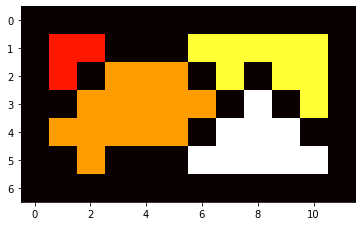

In [19]:
# puzzle 2
import matplotlib.pyplot as plt

def get_matrix(ls):
    mtrx = np.zeros([len(ls) + 2,len(ls[0]) + 2])
    for i in range(len(ls)):
        for j in range(len(ls[0])):
            if ls[i][j] != 9:
                mtrx[i+1][j+1] = 1
    return mtrx

def find_block(mtrx, cnt, i, j):
    mtrx[i, j] = cnt
    if mtrx[i + 1, j] == 1:
        find_block(mtrx, cnt, i + 1, j)
    if mtrx[i, j + 1] == 1:
        find_block(mtrx, cnt, i, j + 1)
    if mtrx[i - 1, j] == 1:
        find_block(mtrx, cnt, i - 1, j)
    if mtrx[i, j - 1] == 1:
        find_block(mtrx, cnt, i, j - 1)
    return mtrx


mtrx = get_matrix(ls9_ex)
#print(mtrx)

cnt = 2
for i in range(1,mtrx.shape[1]-1):
    for j in range(1,mtrx.shape[0]-1):
        if mtrx[j][i] == 1:
            mtrx = find_block(mtrx, cnt, j, i)
            cnt+=1
print(mtrx)

# higher then 1008576
plt.imshow(mtrx, cmap='hot', interpolation='nearest')
## grouping and gettng the answer
groups, counts = np.unique(mtrx, return_counts=True)
counts.sort()
print(counts[-2]*counts[-3]*counts[-4])



1.786412000656128

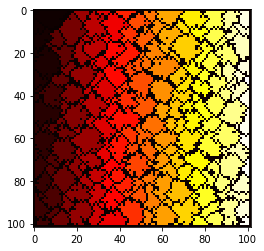

In [29]:
import time

ls_time = []
for t in range(100):
    

    mtrx = get_matrix(ls9)
    #print(mtrx)
    to = time.time()
    cnt = 2
    for i in range(1,mtrx.shape[1]-1):
        for j in range(1,mtrx.shape[0]-1):
            if mtrx[j][i] == 1:
                mtrx = find_block(mtrx, cnt, j, i)
                cnt+=1
    #print(mtrx)

    # higher then 1008576
    #plt.imshow(mtrx, cmap='hot', interpolation='nearest')

    ## grouping and gettng the answer
    groups, counts = np.unique(mtrx, return_counts=True)
    counts.sort()
    counts[-2]*counts[-3]*counts[-4]

    ls_time.append(time.time() - to)

plt.imshow(mtrx, cmap='hot', interpolation='nearest')
sum(ls_time)

<h1>Day 10</h1>

In [30]:
myfile = open("data\day10.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day10 = contents.split('\n')

myfile = open("data\day10_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day10_ex = contents.split('\n')

day10_ex

['[({(<(())[]>[[{[]{<()<>>',
 '[(()[<>])]({[<{<<[]>>(',
 '{([(<{}[<>[]}>{[]{[(<()>',
 '(((({<>}<{<{<>}{[]{[]{}',
 '[[<[([]))<([[{}[[()]]]',
 '[{[{({}]{}}([{[{{{}}([]',
 '{<[[]]>}<{[{[{[]{()[[[]',
 '[<(<(<(<{}))><([]([]()',
 '<{([([[(<>()){}]>(<<{{',
 '<{([{{}}[<[[[<>{}]]]>[]]']

In [31]:
close_dic = {
    ']':'[',
    ')':'(',
    '}':'{',
    '>':'<'
    }
open_list = ['[','(','{','<']
dic_score = {
    ')': 3,
    ']': 57,
    '}': 1197,
    '>': 25137
    }

def count_miss(day):
    sm_fail = 0
    for s in day:
        ls_check = []
        go = True
        i = 0
        while go==True and i < len(s):
            char = s[i]
            if char in open_list:
                ls_check.append(char)
            else:
                if close_dic[char] == ls_check[-1]:
                    ls_check = ls_check[:-1]
                else:
                    sm_fail+=dic_score[char]
                    go=False
            i+=1
    return sm_fail

print(count_miss(day10_ex))
print(count_miss(day10))


26397
392043


In [32]:
def get_not_corrapted(day):
    missing_list = []
    for s in day:    
        ls_check = []
        go = True
        i = 0
        while go==True and i < len(s):
            char = s[i]
            if char in open_list:
                ls_check.append(char)
            else:
                if close_dic[char] == ls_check[-1]:
                    ls_check = ls_check[:-1]
                else:
                    go=False
            i+=1
        if i == len(s):
            missing_list.append(ls_check)
    return missing_list



dic_score_open = {
    '(': 1,
    '[': 2,
    '{': 3,
    '<': 4
    }

def get_median_score(missing_list):
    ls_scores = []
    for s in missing_list:
        sm = 0
        for i in range(len(s)):
            k = len(s)-i-1
            sm = (5*sm) + dic_score_open[s[k]]
        ls_scores.append(sm)

    ls_scores.sort()
    return ls_scores[int(len(ls_scores)/2)]


print(get_median_score(get_not_corrapted(day10_ex)))
print(get_median_score(get_not_corrapted(day10)))

288957
1605968119


<h1>Day 11</h1>

In [33]:
# puzzle 1
import numpy as np

myfile = open("data\day11.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day11 = contents.split('\n')

mtrx11 = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        mtrx11[i][j] = int(day11[i][j])

myfile = open("data\day11_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day11_ex = contents.split('\n')
mtrx11_ex = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        mtrx11_ex[i][j] = int(day11_ex[i][j])

def pump_lights(mtrx, mtrx_memo):
    if np.where(mtrx >= 9)[0].shape[0] == 0:
        return (mtrx+1)*(mtrx_memo), 100-mtrx_memo.sum()
    else:
        nines = np.where(mtrx >= 9)
        mtrx_temp = np.zeros([12,12])
        mtrx_pad = np.ones([3,3])
        for i in range(nines[0].shape[0]):
            mtrx_temp[nines[0][i]:nines[0][i] + 3,nines[1][i]:nines[1][i] + 3] += mtrx_pad
            mtrx_memo[nines[0][i],nines[1][i]] = 0
        mtrx+=mtrx_temp[1:-1,1:-1]
        mtrx=mtrx*mtrx_memo
        return pump_lights(mtrx, mtrx_memo)

sm_ex = 0
for i in range(100):
    mtrx11_ex,sm1 = pump_lights(mtrx11_ex, np.ones([10,10]))
    sm_ex+=sm1
print(sm_ex)

sm = 0
for i in range(100):
    mtrx11,sm1 = pump_lights(mtrx11, np.ones([10,10]))
    sm+=sm1
print(sm)

1656.0
1642.0


In [34]:
# puzzle 2
import numpy as np

myfile = open("data\day11.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day11 = contents.split('\n')

mtrx11 = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        mtrx11[i][j] = int(day11[i][j])

myfile = open("data\day11_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day11_ex = contents.split('\n')
mtrx11_ex = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        mtrx11_ex[i][j] = int(day11_ex[i][j])


end_round_ex = 0
while mtrx11_ex.sum() != 0:
    mtrx11_ex,sm1 = pump_lights(mtrx11_ex, np.ones([10,10]))
    end_round_ex+=1
print(end_round_ex)

end_round = 0
while mtrx11.sum() != 0:
    mtrx11,sm1 = pump_lights(mtrx11, np.ones([10,10]))
    end_round+=1
print(end_round)

195
320


<h1>Day 12</h1>

In [35]:
# puzzle 1
myfile = open("data\day12_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12_ex = contents.split('\n')
ls_path_12_ex = [(path.split('-')[0],path.split('-')[1]) for path in day12_ex]
dic_path_12_ex = {}
for i in range(len(ls_path_12_ex)):
    dic_path_12_ex[ls_path_12_ex[i][0]] = []
    dic_path_12_ex[ls_path_12_ex[i][1]] = []
for i in range(len(ls_path_12_ex)):
    dic_path_12_ex[ls_path_12_ex[i][0]].append(ls_path_12_ex[i][1])
    dic_path_12_ex[ls_path_12_ex[i][1]].append(ls_path_12_ex[i][0])


In [36]:
# puzzle 1
myfile = open("data\day12_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12_ex = contents.split('\n')
ls_path_12_ex = [(path.split('-')[0],path.split('-')[1]) for path in day12_ex]
dic_path_12_ex = {}
for i in range(len(ls_path_12_ex)):
    dic_path_12_ex[ls_path_12_ex[i][0]] = []
    dic_path_12_ex[ls_path_12_ex[i][1]] = []
for i in range(len(ls_path_12_ex)):
    dic_path_12_ex[ls_path_12_ex[i][0]].append(ls_path_12_ex[i][1])
    dic_path_12_ex[ls_path_12_ex[i][1]].append(ls_path_12_ex[i][0])

myfile = open("data\day12_ex2.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12_ex2 = contents.split('\n')
ls_path_12_ex2 = [(path.split('-')[0],path.split('-')[1]) for path in day12_ex2]
dic_path_12_ex2 = {}
for i in range(len(ls_path_12_ex2)):
    dic_path_12_ex2[ls_path_12_ex2[i][0]] = []
    dic_path_12_ex2[ls_path_12_ex2[i][1]] = []
for i in range(len(ls_path_12_ex2)):
    dic_path_12_ex2[ls_path_12_ex2[i][0]].append(ls_path_12_ex2[i][1])
    dic_path_12_ex2[ls_path_12_ex2[i][1]].append(ls_path_12_ex2[i][0])

myfile = open("data\day12_ex3.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12_ex3 = contents.split('\n')
ls_path_12_ex3 = [(path.split('-')[0],path.split('-')[1]) for path in day12_ex3]
dic_path_12_ex3 = {}
for i in range(len(ls_path_12_ex3)):
    dic_path_12_ex3[ls_path_12_ex3[i][0]] = []
    dic_path_12_ex3[ls_path_12_ex3[i][1]] = []
for i in range(len(ls_path_12_ex3)):
    dic_path_12_ex3[ls_path_12_ex3[i][0]].append(ls_path_12_ex3[i][1])
    dic_path_12_ex3[ls_path_12_ex3[i][1]].append(ls_path_12_ex3[i][0])



myfile = open("data\day12.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12 = contents.split('\n')
ls_path_12 = [(path.split('-')[0],path.split('-')[1]) for path in day12]
dic_path_12 = {}
for i in range(len(ls_path_12)):
    dic_path_12[ls_path_12[i][0]] = []
    dic_path_12[ls_path_12[i][1]] = []
for i in range(len(ls_path_12)):
    dic_path_12[ls_path_12[i][0]].append(ls_path_12[i][1])
    dic_path_12[ls_path_12[i][1]].append(ls_path_12[i][0])

In [37]:
A = []

def maze(dic, path, ls_dont_go, rout):
    global A
    if path == 'end':
        A.append(rout)
        return True
    ls_paths = dic[path]
    lss = [ls_dont_go.copy() for i in range(len(ls_paths))]
    routs = [rout.copy() for i in range(len(ls_paths))]
    for i in range(len(ls_paths)):
        new_path = ls_paths[i]
        new_rout = routs[i]
        if new_path not in lss[i]:
            new_rout.append(new_path)
            if new_path.islower():
                lss[i].append(new_path)
            maze(dic, new_path, lss[i], new_rout)

#ex1
for key in dic_path_12_ex:
    if 'start' in dic_path_12_ex[key]:
        dic_path_12_ex[key].remove('start')

A = []
maze(dic_path_12_ex, 'start', ['start'], ['start'])
print(len(A))
print('example:')
for s in A:
    print(s)

#ex2
for key in dic_path_12_ex2:
    if 'start' in dic_path_12_ex2[key]:
        dic_path_12_ex2[key].remove('start')
A = []
maze(dic_path_12_ex2, 'start', ['start'], ['start'])
print(len(A))

#ex3
for key in dic_path_12_ex3:
    if 'start' in dic_path_12_ex3[key]:
        dic_path_12_ex3[key].remove('start')
A = []
maze(dic_path_12_ex3, 'start', ['start'], ['start'])
print(len(A))

#sol
for key in dic_path_12:
    if 'start' in dic_path_12[key]:
        dic_path_12[key].remove('start')
A = []
maze(dic_path_12, 'start', ['start'], ['start'])
print(len(A))


10
example:
['start', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'end']
['start', 'A', 'b', 'end']
['start', 'A', 'end']
['start', 'b', 'A', 'c', 'A', 'end']
['start', 'b', 'A', 'end']
['start', 'b', 'end']
19
226
4691


In [38]:
#puzzle 2

A = []
def maze_2(dic, path, ls_dont_go, lower, cnt, rout):
    global A
    if path == 'end':
        A.append(rout)
        return True
    ls_paths = dic[path]
    # creating lists of reference
    # lss - caves not to enter
    # routs - all the routs
    # counts - the remember the second small cave
    lss = [ls_dont_go.copy() for i in range(len(ls_paths))]
    routs = [rout.copy() for i in range(len(ls_paths))]
    counts = [cnt for i in range(len(ls_paths))]
    for i in range(len(ls_paths)):
        new_path = ls_paths[i]
        new_rout = routs[i]
        if new_path not in lss[i] :
            new_rout.append(new_path)
            if new_path == lower and counts[i] > 0:
                lss[i].append(new_path)
            if new_path == lower:
                counts[i]+=1
            if new_path.islower() and new_path != lower:
                lss[i].append(new_path)
            maze_2(dic, new_path, lss[i], lower, counts[i], new_rout)

# ex1
lowers = [key for key in dic_path_12_ex if key.islower() and key not in ['start','end']]
A = []
for lower in lowers:
    maze_2(dic_path_12_ex, 'start', ['start'], lower, 0, ['start'])

print(len([list(x) for x in set(tuple(x) for x in A)]))
print('example')
for s in [list(x) for x in set(tuple(x) for x in A)]:
    print(s)

# ex2
lowers = [key for key in dic_path_12_ex2 if key.islower() and key not in ['start','end']]
A = []
for lower in lowers:
    maze_2(dic_path_12_ex2, 'start', ['start'], lower, 0, [])

print(len([list(x) for x in set(tuple(x) for x in A)]))

# ex3
lowers = [key for key in dic_path_12_ex3 if key.islower() and key not in ['start','end']]
A = []
for lower in lowers:
    maze_2(dic_path_12_ex3, 'start', ['start'], lower, 0, ['start'])

print(len([list(x) for x in set(tuple(x) for x in A)]))

# solution
lowers = [key for key in dic_path_12 if key.islower() and key not in ['start','end']]
A = []
for lower in lowers:
    maze_2(dic_path_12, 'start', ['start'], lower, 0, ['start'])

print(len([list(x) for x in set(tuple(x) for x in A)]))


36
example
['start', 'A', 'b', 'd', 'b', 'end']
['start', 'b', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'b', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'b', 'd', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'b', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'd', 'b', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'c', 'A', 'end']
['start', 'A', 'c', 'A', 'end']
['start', 'b', 'end']
['start', 'b', 'A', 'c', 'A', 'end']
['start', 'b', 'A', 'c', 'A', 'c', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'b', 'end']
['start', 'b', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'c', 'A', 'end']
['start', 'b', 'd', 'b', 'A', 'end']
['start', 'b', 'A', 'b', 'end']
['start', 'b', 'A', 'b', 'A'

<h1>Day 13</h1>

In [39]:
# read data
myfile = open("data\day13.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day13 = contents.split('\n\n')
day13_cor = day13[0].split('\n')
day13_cor_ls = [cor.split(',') for cor in day13_cor]
day13_fold = day13[1].split('\n')

myfile = open("data\day13_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day13_ex = contents.split('\n\n')
day13_ex_cor = day13_ex[0].split('\n')
day13_ex_cor_ls = [cor.split(',') for cor in day13_ex_cor]
day13_ex_fold = day13_ex[1].split('\n')




In [40]:
import numpy as np

def to_np(ls):
    dim = np.array(ls).astype(int).max(0)
    mtrx = np.zeros([dim[0]+1,dim[1]+1])
    for dot in ls:
        mtrx[int(dot[0]), int(dot[1])] = 1
    return mtrx.T

mtrx_ex = to_np(day13_ex_cor_ls)
for fold in day13_ex_fold:
    if fold[11] == 'y':
        mtrx_ex = mtrx_ex[:int(fold[13:]),:] + np.flip(mtrx_ex[int(fold[13:])+1:,:],0)
        print(((mtrx_ex == 0) == False).sum())
        print('')
    if fold[11] == 'x':
        mtrx_ex = mtrx_ex[:,:int(fold[13:])] + np.flip(mtrx_ex[:,int(fold[13:])+1:],1)


for i in range(mtrx_ex.shape[0]):
    s = ''
    for j in range(mtrx_ex.shape[1]):
        if mtrx_ex[i,j] > 0:
            s+='#'
        if mtrx_ex[i,j] == 0:
            s+=' '
    print(s)

cnt = 0
mtrx = to_np(day13_cor_ls)
for fold in day13_fold:
    if fold[11] == 'y':
        mtrx = mtrx[:int(fold[13:]),:] + np.flip(mtrx[int(fold[13:])+1:,:],0)
    if fold[11] == 'x':
        mtrx = mtrx[:,:int(fold[13:])] + np.flip(mtrx[:,int(fold[13:])+1:],1)
        if cnt == 0:
            print(((mtrx == 0) == False).sum())
            print('')
        cnt+=1


for i in range(mtrx.shape[0]):
    s = ''
    for j in range(mtrx.shape[1]):
        if mtrx[i,j] > 0:
            s+='#'
        if mtrx[i,j] == 0:
            s+=' '
    print(s)

17

#####
#   #
#   #
#   #
#####
     
     
807

#     ##  #  # ####  ##  #  # ####   ## 
#    #  # #  # #    #  # #  # #       # 
#    #    #### ###  #    #  # ###     # 
#    # ## #  # #    # ## #  # #       # 
#    #  # #  # #    #  # #  # #    #  # 
####  ### #  # ####  ###  ##  ####  ##  


<h1>Day 14</h1>

In [41]:
myfile = open("data\day14.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day14 = contents.split('\n\n')
start = day14[0]
dic14 = {s[:2]:s[-1]  for s in day14[1].split('\n')}

myfile = open("data\day14_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day14_ex = contents.split('\n\n')
start_ex = day14_ex[0]
dic14_ex = {s[:2]:s[-1]  for s in day14_ex[1].split('\n')}


In [42]:
def count_pairsdic(dic, dic_pairs):
    dic_cnt = {key:0 for key in dic}
    for key in dic:
        dic_cnt[key[0] + dic[key]]+=dic_pairs[key]
        dic_cnt[dic[key] + key[1]]+=dic_pairs[key]
    return dic_cnt

def final14(dic, start, rounds):
    dic_counts = {key:0 for key in dic}
    for i in range(len(start)-1):
        dic_counts[start[i:i+2]]+=1

    for i in range(rounds):
        dic_counts = count_pairsdic(dic, dic_counts)

    #count all pairs for each char
    #reduce multiply by 0.5 to reduce duplicates
    #add first and last of start char
    dic_char = {}
    for key in dic_counts:
        for char in key:
            if char in dic_char:
                dic_char[char]+=dic_counts[key]/2
            else:
                dic_char[char]=dic_counts[key]/2
    dic_char[start[0]]+=1
    dic_char[start[-1]]+=1
    
    return int(dic_char[max(dic_char, key=dic_char.get)] - dic_char[min(dic_char, key=dic_char.get)])



print(final14(dic14_ex, start_ex, 10))
print(final14(dic14, start, 10))

print(final14(dic14_ex, start_ex, 40))
print(final14(dic14, start, 40))



1588
2434
2188189693529
2587447599163


<h1>Day 15</h1>

[[1 1 6 3 7 5 1 7 4 2]
 [1 3 8 1 3 7 3 6 7 2]
 [2 1 3 6 5 1 1 3 2 8]
 [3 6 9 4 9 3 1 5 6 9]
 [7 4 6 3 4 1 7 1 1 1]
 [1 3 1 9 1 2 8 1 3 7]
 [1 3 5 9 9 1 2 4 2 1]
 [3 1 2 5 4 2 1 6 3 9]
 [1 2 9 3 1 3 8 5 2 1]
 [2 3 1 1 9 4 4 5 8 1]]


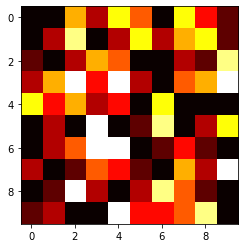

In [43]:
import numpy as np

myfile = open("data\day15.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day15 = contents.split('\n')
mtrx15 = []
for row in day15:
    mtrx15.append([int(x) for x in row])

mtrx15 = np.array(mtrx15)

myfile = open("data\day15_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day15_ex = contents.split('\n')
mtrx15_ex = []
for row in day15_ex:
    mtrx15_ex.append([int(x) for x in row])

mtrx15_ex = np.array(mtrx15_ex)

import matplotlib.pyplot as plt
print(mtrx15_ex)
plt.imshow(mtrx15_ex, cmap='hot', interpolation='nearest')

In [44]:
## Building the graph
test_matrix = mtrx15

mtrx_pad = np.zeros([test_matrix.shape[0] + 2, test_matrix.shape[1] + 2])
for i in range(test_matrix.shape[0]):
    for j in range(test_matrix.shape[1]):
        mtrx_pad[i+1,j+1] = test_matrix[i,j]

graph = {}
for i in range(test_matrix.shape[0]):
    for j in range(test_matrix.shape[1]):
        graph[(i,j)] = {(i+1,j): mtrx_pad[i+2,j+1], (i,j+1): mtrx_pad[i+1,j+2], (i-1,j): mtrx_pad[i,j+1], (i,j-1):mtrx_pad[i+1,j]}
        if i-1==-1:
           graph[(i,j)].pop((i-1,j))
        if j-1==-1:
           graph[(i,j)].pop((i,j-1)) 
        if i+1==test_matrix.shape[0]:
           graph[(i,j)].pop((i+1,j))
        if j+1==test_matrix.shape[1]:
           graph[(i,j)].pop((i,j+1)) 
graph

{(0, 0): {(1, 0): 2.0, (0, 1): 2.0},
 (0, 1): {(1, 1): 5.0, (0, 2): 1.0, (0, 0): 1.0},
 (0, 2): {(1, 2): 5.0, (0, 3): 9.0, (0, 1): 2.0},
 (0, 3): {(1, 3): 7.0, (0, 4): 9.0, (0, 2): 1.0},
 (0, 4): {(1, 4): 5.0, (0, 5): 1.0, (0, 3): 9.0},
 (0, 5): {(1, 5): 1.0, (0, 6): 7.0, (0, 4): 9.0},
 (0, 6): {(1, 6): 2.0, (0, 7): 1.0, (0, 5): 1.0},
 (0, 7): {(1, 7): 1.0, (0, 8): 4.0, (0, 6): 7.0},
 (0, 8): {(1, 8): 8.0, (0, 9): 4.0, (0, 7): 1.0},
 (0, 9): {(1, 9): 8.0, (0, 10): 1.0, (0, 8): 4.0},
 (0, 10): {(1, 10): 9.0, (0, 11): 5.0, (0, 9): 4.0},
 (0, 11): {(1, 11): 1.0, (0, 12): 2.0, (0, 10): 1.0},
 (0, 12): {(1, 12): 8.0, (0, 13): 1.0, (0, 11): 5.0},
 (0, 13): {(1, 13): 7.0, (0, 14): 7.0, (0, 12): 2.0},
 (0, 14): {(1, 14): 2.0, (0, 15): 5.0, (0, 13): 1.0},
 (0, 15): {(1, 15): 2.0, (0, 16): 5.0, (0, 14): 7.0},
 (0, 16): {(1, 16): 1.0, (0, 17): 2.0, (0, 15): 5.0},
 (0, 17): {(1, 17): 2.0, (0, 18): 1.0, (0, 16): 5.0},
 (0, 18): {(1, 18): 9.0, (0, 19): 1.0, (0, 17): 2.0},
 (0, 19): {(1, 19): 2.0, (0

In [45]:
def djstep(start_node):
    ls_nodes = [key for key in graph[start_node]]
    for node in ls_nodes:
        if graph[start_node][node] + dic[start_node]['P'] < dic[node]['P']:
            dic[node]['P'] = graph[start_node][node] + dic[start_node]['P']
            dic[node]['before'] = start_node
    return ls_nodes
#strat
dic = {key:{'P':1000, 'before': (0,0)} for key in graph}

start_node = (0,0)
dic[start_node]['P']=0

#first_step
ls_stop = set([])
ls_nodes_new = djstep((0,0))
ls_stop.add((0,0))

# go in a loop
while len(ls_stop) != len(graph):
    ls_nodes_new_temp = []
    for start_node in ls_nodes_new:
        if start_node not in ls_stop:
            ls_nodes = djstep(start_node)
            ls_stop.add(start_node)
            for node in ls_nodes:
                if node not in ls_stop:
                    ls_nodes_new_temp.append(node)
    ls_nodes_new = set(ls_nodes_new_temp)

rout = []
node = (99,99)
sm = 0
while node != (0,0):
    rout.append(node)
    node = dic[node]['before']
    sm+=test_matrix[node]
print(sm)

361


....................................................................................................
25..................................................................................................
.1..................................................................................................
.6..................................................................................................
.1..................................................................................................
.4..................................................................................................
.1..................................................................................................
.1..................................................................................................
.3..................................................................................................
.1211......................................................................................

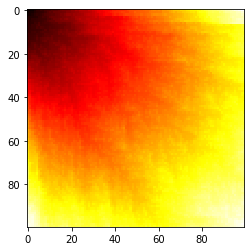

In [46]:

for i in range(test_matrix.shape[0]):
    s = ''
    for j in range(test_matrix.shape[1]):
        if (i,j) in rout:
            s+=str(test_matrix[i,j])
        else:
            s+='.'
    print(s)

mtrx = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        mtrx[i,j] = dic[(i,j)]['P']
import matplotlib.pyplot as plt
plt.imshow(mtrx, cmap='hot', interpolation='nearest')

In [47]:
# puzzle 2

## Building the graph
def get_graph(test_matrix):
    new_test_matrix = np.zeros([test_matrix.shape[0]*5, test_matrix.shape[1]*5])
    for i in range(5):
        for j in range(5):
            mtrx_insert = test_matrix + i + j
            for k in range(mtrx_insert.shape[0]):
                for t in range(mtrx_insert.shape[1]):
                    if mtrx_insert[k,t] > 9:
                        new_test_matrix[k + i*test_matrix.shape[0],t + j*test_matrix.shape[1]] = mtrx_insert[k,t] - 9
                    else:
                        new_test_matrix[k + i*test_matrix.shape[0],t + j*test_matrix.shape[1]] = mtrx_insert[k,t]

    test_matrix = new_test_matrix

    mtrx_pad = np.zeros([test_matrix.shape[0] + 2, test_matrix.shape[1] + 2])
    for i in range(test_matrix.shape[0]):
        for j in range(test_matrix.shape[1]):
            mtrx_pad[i+1,j+1] = test_matrix[i,j]

    graph = {}
    for i in range(test_matrix.shape[0]):
        for j in range(test_matrix.shape[1]):
            graph[(i,j)] = {(i+1,j): mtrx_pad[i+2,j+1], (i,j+1): mtrx_pad[i+1,j+2], (i-1,j): mtrx_pad[i,j+1], (i,j-1):mtrx_pad[i+1,j]}
            if i-1==-1:
                graph[(i,j)].pop((i-1,j))
            if j-1==-1:
                graph[(i,j)].pop((i,j-1)) 
            if i+1==test_matrix.shape[0]:
                graph[(i,j)].pop((i+1,j))
            if j+1==test_matrix.shape[1]:
                graph[(i,j)].pop((i,j+1))
    print(len(graph))
    return graph, test_matrix

graph, test_matrix= get_graph(mtrx15_ex)
graph, test_matrix = get_graph(mtrx15)


2500
250000


In [48]:
def djstep(graph ,start_node):
    ls_nodes = [key for key in graph[start_node]]
    for node in ls_nodes:
        if graph[start_node][node] + dic[start_node]['P'] < dic[node]['P']:
            dic[node]['P'] = graph[start_node][node] + dic[start_node]['P']
            dic[node]['before'] = start_node
    return ls_nodes

#strat
dic = {key:{'P':1000000, 'before': (0,0)} for key in graph}

start_node = (0,0)
dic[start_node]['P']=0

#first_step
ls_stop = set()
ls_nodes_new = djstep(graph, (0,0))
ls_stop.add((0,0))

# go in a loop
while len(ls_stop) != len(graph):
    ls_nodes_new_temp = []
    for start_node in ls_nodes_new:
        if start_node not in ls_stop:
            ls_nodes = djstep(graph, start_node)
            ls_stop.add(start_node)
            for node in ls_nodes:
                if node not in ls_stop:
                    ls_nodes_new_temp.append(node)
    ls_nodes_new = set(ls_nodes_new_temp)

rout = []
node = (test_matrix.shape[0] - 1,test_matrix.shape[1] - 1)
sm = 0
while node != (0,0):
    sm+=test_matrix[node]
    rout.append(node)
    last = test_matrix[node]
    node = dic[node]['before']
sm - last

2838.0

In [ ]:
for i in range(test_matrix.shape[0]):
    s = ''
    for j in range(test_matrix.shape[1]):
        if (i,j) in rout:
            s+=str(test_matrix[i,j])[0]
        else:
            s+='.'
    print(s)

<h1>Day 16</h1>

In [ ]:
input_ex1 = 'D2FE28'
input_ex2 = '38006F45291200'
input_ex3 = 'EE00D40C823060'
input_ex4 = '8A004A801A8002F478' #16
input_ex5 = '620080001611562C8802118E34' #12
input_ex6 = 'C0015000016115A2E0802F182340' #23
input_ex7 = 'A0016C880162017C3686B18A3D4780' #31
input_final = '2056FA18025A00A4F52AB13FAB6CDA779E1B2012DB003301006A35C7D882200C43289F07A5A192D200C1BC011969BA4A485E63D8FE4CC80480C00D500010F8991E23A8803104A3C425967260020E551DC01D98B5FEF33D5C044C0928053296CDAFCB8D4BDAA611F256DE7B945220080244BE59EE7D0A5D0E6545C0268A7126564732552F003194400B10031C00C002819C00B50034400A70039C009401A114009201500C00B00100D00354300254008200609000D39BB5868C01E9A649C5D9C4A8CC6016CC9B4229F3399629A0C3005E797A5040C016A00DD40010B8E508615000213112294749B8D67EC45F63A980233D8BCF1DC44FAC017914993D42C9000282CB9D4A776233B4BF361F2F9F6659CE5764EB9A3E9007ED3B7B6896C0159F9D1EE76B3FFEF4B8FCF3B88019316E51DA181802B400A8CFCC127E60935D7B10078C01F8B50B20E1803D1FA21C6F300661AC678946008C918E002A72A0F27D82DB802B239A63BAEEA9C6395D98A001A9234EA620026D1AE5CA60A900A4B335A4F815C01A800021B1AE2E4441006A0A47686AE01449CB5534929FF567B9587C6A214C6212ACBF53F9A8E7D3CFF0B136FD061401091719BC5330E5474000D887B24162013CC7EDDCDD8E5E77E53AF128B1276D0F980292DA0CD004A7798EEEC672A7A6008C953F8BD7F781ED00395317AF0726E3402100625F3D9CB18B546E2FC9C65D1C20020E4C36460392F7683004A77DB3DB00527B5A85E06F253442014A00010A8F9106108002190B61E4750004262BC7587E801674EB0CCF1025716A054AD47080467A00B864AD2D4B193E92B4B52C64F27BFB05200C165A38DDF8D5A009C9C2463030802879EB55AB8010396069C413005FC01098EDD0A63B742852402B74DF7FDFE8368037700043E2FC2C8CA00087C518990C0C015C00542726C13936392A4633D8F1802532E5801E84FDF34FCA1487D367EF9A7E50A43E90'

dic_hex = { '0' : '0000',
            '1' : '0001',
            '2' : '0010',
            '3' : '0011',
            '4' : '0100',
            '5' : '0101',
            '6' : '0110',
            '7' : '0111',
            '8' : '1000',
            '9' : '1001',
            'A' : '1010',
            'B' : '1011',
            'C' : '1100',
            'D' : '1101',
            'E' : '1110',
            'F' : '1111'}

In [ ]:
def literal_value(s, pos):
    while int(s[pos]) == 1:
        pos+=5
    pos+=5
    return pos

V = []
def rec_string(s, pos):
    global V
    if sum([int(k) for k in s[pos:]]) == 0 or s[pos:] == '':
        return pos
    version = int(s[pos:pos+3],2)
    V.append(version)
    type_id = int(s[pos+3:pos+6],2)
    pos+=6
    if type_id == 4:
        return literal_value(s, pos)
    if type_id != 4:
        length_type_id = s[pos]
        pos+=1
        if length_type_id == '0':
            bit_length=15
            length = int(s[pos:pos+bit_length],2)
            pos+=bit_length
            pos_0_op = pos
            while pos - pos_0_op < length:
                pos = rec_string(s, pos)
            return pos
        if length_type_id == '1':
            bit_length=11
            length = int(s[pos:pos+bit_length],2)
            pos+=bit_length
            for rnd in range(length):
                pos = rec_string(s, pos)
            return pos

def go(input):
    global V
    s = ''
    for char in input:
        s+=dic_hex[char]
    V = []
    rec_string(s, 0)
    print(V)
    print(sum(V))


go(input_ex1)
go(input_ex2)
go(input_ex3)
go(input_ex4)
go(input_ex5)
go(input_ex6)
go(input_ex7)
go(input_final)

[6]
6
[1, 6, 2]
9
[7, 2, 4, 1]
14
[4, 1, 5, 6]
16
[3, 0, 0, 5, 1, 0, 3]
12
[6, 0, 0, 6, 4, 7, 0]
23
[5, 1, 3, 7, 6, 5, 2, 2]
31
[1, 4, 2, 4, 0, 6, 3, 6, 0, 2, 3, 5, 1, 0, 2, 7, 6, 5, 6, 1, 4, 7, 3, 0, 4, 7, 4, 0, 5, 0, 2, 0, 5, 2, 3, 7, 5, 1, 0, 2, 1, 2, 0, 4, 3, 2, 0, 7, 3, 2, 3, 1, 6, 3, 1, 1, 7, 5, 3, 4, 4, 6, 3, 5, 2, 6, 1, 4, 1, 0, 3, 3, 4, 1, 0, 2, 3, 2, 6, 4, 5, 2, 6, 5, 6, 2, 3, 2, 4, 7, 6, 0, 6, 5, 3, 2, 1, 2, 1, 4, 2, 4, 5, 5, 1, 6, 7, 1, 0, 5, 2, 1, 7, 5, 5, 6, 5, 5, 3, 7, 7, 4, 6, 0, 5, 1, 4, 4, 3, 6, 7, 2, 4, 4, 6, 6, 3, 7, 1, 5, 7, 2, 1, 1, 3, 7, 3, 5, 3, 1, 4, 4, 6, 3, 1, 5, 5, 2, 0, 5, 3, 4, 4, 2, 4, 6, 5, 0, 4, 3, 2, 2, 7, 0, 6, 0, 0, 1, 5, 0, 5, 3, 7, 3, 0, 0, 7, 4, 4, 2, 3, 5, 1, 5, 2, 4, 2, 0, 3, 7, 4, 3, 5, 4, 0, 2, 5, 4, 7, 4, 0, 2, 4, 1, 1, 4, 5, 4, 5, 1, 7, 5, 7, 6, 1, 0, 2, 4, 7, 1, 6, 4, 5, 5, 2, 3, 1, 4, 7, 2, 3, 6, 1, 7, 0, 2, 2, 1, 6, 5, 7, 7, 7, 4, 5, 7, 1, 4, 0, 5, 0, 0, 3, 6, 2, 2, 0, 5]
917


In [ ]:
#puzzle 2

input2_ex1 = 'C200B40A82'
input2_ex2 = '04005AC33890'
input2_ex3 = '880086C3E88112'
input2_ex4 = 'CE00C43D881120'
input2_ex5 = 'F600BC2D8F'
input2_ex6 = 'D8005AC2A8F0'
input2_ex7 = '9C005AC2F8F0'
input2_ex8 = '9C0141080250320F1802104A08'

In [ ]:
import math

def literal_value_number(s, pos):
    number = ''
    while int(s[pos]) == 1:
        number+=s[pos+1:pos+5]
        pos+=5
    number+=s[pos+1:pos+5]
    pos+=5
    return pos, int(number,2)

def get_operate(type_id,A):
    if type_id == 0: num = sum(A)
    if type_id == 1: num = math.prod(A)
    if type_id == 2: num = min(A)
    if type_id == 3: num = max(A)
    if type_id == 5: 
        if A[1] < A[0]: num = 1
        else: num = 0
    if type_id == 6: 
        if A[1] > A[0]: num = 1
        else: num = 0
    if type_id == 7: 
        if A[1] == A[0]: num = 1
        else: num = 0
    return num

def rec_string(s, pos):
    version = int(s[pos:pos+3],2)
    type_id = int(s[pos+3:pos+6],2)
    pos+=6
    if type_id == 4:
        return literal_value_number(s, pos)
    if type_id != 4:
        length_type_id = s[pos]
        pos+=1
        if length_type_id == '0':
            bit_length=15
            length = int(s[pos:pos+bit_length],2)
            pos+=bit_length
            pos_0_op = pos
            A = []
            while pos - pos_0_op < length:
                pos, num = rec_string(s, pos)
                A.append(num)
            return pos, get_operate(type_id,A)
        if length_type_id == '1':
            bit_length=11
            length = int(s[pos:pos+bit_length],2)
            pos+=bit_length
            A = []
            for rnd in range(length):
                pos, num = rec_string(s, pos)
                A.append(num)
            return pos, get_operate(type_id,A)

def go(input):
    s = ''
    for char in input:
        s+=dic_hex[char]
    pos, num = rec_string(s, 0)
    print(num)


go(input2_ex1) # 1+2 = 3
go(input2_ex2) # 6*9 = 54
go(input2_ex3) # min(7,8,9) = 7
go(input2_ex4) # max(7,8,9) = 9
go(input2_ex5) # if 5 < 15 then 1 else 0 = 1
go(input2_ex6) # if 5 > 15 then 1 else 0 = 0
go(input2_ex7) # if 5 = 15 then 1 else 0 = 0
go(input2_ex8) # if (1 + 3) = (2 * 2) then 1 else 1
go(input_final)




3
54
7
9
0
1
0
1
2536453523344


<h1>Day 17</h1>

In [ ]:
input17_ex = { 'x0':20,
            'x1':30,
            'y0':-10,
            'y1':-5
}

input17 = { 'x0':48,
            'x1':70,
            'y0':-189,
            'y1':-148
}

In [ ]:
### There is a math way to calculate max_y ~ 200, need to think about it
def shoot(Vx, Vy, box):
    x = Vx
    y = Vy
    y_out = 0
    while True:
        if box['x0'] <= x <= box['x1'] and box['y0'] <= y <= box['y1']:
            return True, y_out
        if x > box['x1'] or y < box['y0']:
            return False, y_out
        Vx -= 1
        Vy -= 1
        if Vx < 0: Vx = 0
        x+=Vx
        y+=Vy
        y_out = max(y, y_out)

def find_y_max(box):
    pairs = set()
    y_max_tot = 0
    for i in range(0, box['x1'] + 1):
        for j in range(box['y0'] - 1, 200):
            suc, y_max = shoot(i, j, box)
            if suc:
                y_max_tot = max(y_max_tot, y_max)
                pairs.add((i,j))
    return y_max_tot, len(pairs)

print(find_y_max(input17_ex))
print(find_y_max(input17))


(45, 112)
(17766, 1733)


<h1>Day 18</h1>

In [103]:
import numpy as np

myfile = open("data\day18.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day18 = contents.split('\n')

myfile = open("data\day18_ex1.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day18_ex1 = contents.split('\n')

myfile = open("data\day18_ex2.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day18_ex2 = contents.split('\n')


['[[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]]',
 '[7,[[[3,7],[4,3]],[[6,3],[8,8]]]]',
 '[[2,[[0,8],[3,4]]],[[[6,7],1],[7,[1,6]]]]',
 '[[[[2,4],7],[6,[0,5]]],[[[6,8],[2,8]],[[2,1],[4,5]]]]',
 '[7,[5,[[3,8],[1,4]]]]',
 '[[2,[2,2]],[8,[8,1]]]',
 '[2,9]',
 '[1,[[[9,3],9],[[9,0],[0,7]]]]',
 '[[[5,[7,4]],7],1]',
 '[[[[4,2],2],6],[8,7]]']

In [301]:

import math

def explode(s):
    new_s = s
    ### Getting to the most depth
    level = 0
    mx_level = 0
    for i in range(len(s)):
        if s[i] == '[':
            level+=1
        if s[i] == ']':
            level-=1
        mx_level = max(mx_level, level)
    level = 0
    for i in range(len(s)):
        if s[i] == '[':
            level+=1
        if s[i] == ']':
            level-=1
        if mx_level == level and level>=5:
            #deph level and pos i
            j = i
            get_pair_5 = ''
            while s[j] != ']':
                j+=1
                get_pair_5 += s[j]
            nums_exploed = get_pair_5[:-1].split(',')
            ln = len(get_pair_5)
            ## getting 2 numbers
            new_s = s[:i] + '0' + s[j+1:]
            k_left = i
            while s[k_left] in [']','[',','] and k_left!=0:
                k_left-=1
            t_left = 0
            if k_left != 0:
                while s[k_left-1] not in [']','[',',']:
                    k_left-=1
                    t_left+=1
            k_right = j
            while s[k_right] in [']','[',','] and k_right!=len(s) - 1:
                k_right+=1
            t_right = 0
            if k_right != len(s) - 1:
                while s[k_right+1] not in [']','[',',']:
                    k_right+=1
                    t_right+=1
            if k_right==len(s) - 1:
                left_num = int(new_s[k_left:k_left+t_left+1]) + int(nums_exploed[0])
                new_s = new_s[:k_left] + str(left_num) + new_s[k_left+t_left+1:]
            if k_left == 0:
                right_num = int(new_s[k_right - ln - t_right:k_right + 1 - ln]) + int(nums_exploed[1])
                new_s = new_s[:k_right - ln - t_right] + str(right_num) + new_s[k_right + 1 - ln:]
            if k_left != 0 and k_right!=len(s)-1:
                left_num = int(new_s[k_left:k_left+t_left+1]) + int(nums_exploed[0])
                right_num = int(new_s[k_right - ln - t_right:k_right + 1 - ln]) + int(nums_exploed[1])
                new_s = new_s[:k_left] + str(left_num) + new_s[k_left+t_left+1 :k_right - ln - t_right] + str(right_num) + new_s[k_right  + 1 - ln:]
            return new_s
    return new_s

#split function (won't work on a nmber bigger then 99)
def split(s):
    new_s = s
    for i in range(len(s)-1):
        if s[i] not in [']','[',','] and s[i+1] not in [']','[',',']:
            new_s = s[:i] + '[' + str(math.floor(int(s[i]+s[i+1])/2)) + ',' + str(math.ceil(int(s[i]+s[i+1])/2)) + ']' + s[i+2:]
            return new_s
    return new_s

# re running explode and split one time
def re_explode(before_explode):
    after_explode = explode(before_explode)
    while after_explode != before_explode:
        before_explode = after_explode
        after_explode = explode(before_explode)
    after_split = split(after_explode)
    return after_split

# adding two snailfish and running reduce
def add_snailfish(snail1, snail2):
    adds = '[' + snail1 + ',' + snail2 +']'
    before_adds = adds
    afte_adds = re_explode(before_adds)
    while afte_adds != before_adds:
        before_adds = afte_adds
        afte_adds = re_explode(before_adds)
    afte_adds = re_explode(afte_adds)
    return afte_adds

In [306]:
# checking 4 ex

snail1 = '[[[[4,3],4],4],[7,[[8,4],9]]]'
snail2 = '[1,1]'
print(add_snailfish(snail1, snail2)  == '[[[[0,7],4],[[7,8],[6,0]]],[8,1]]')

snails = ['[1,1]','[2,2]','[3,3]','[4,4]','[5,5]','[6,6]']
snail_now = snails[0]
for i in range(1,len(snails)):
    snail_now = add_snailfish(snail_now,snails[i])
print(snail_now == '[[[[5,0],[7,4]],[5,5]],[6,6]]')

snail_now = day18_ex1[0]
for i in range(1,len(day18_ex1)):
    snail_now = add_snailfish(snail_now, day18_ex1[i])
print(snail_now == '[[[[8,7],[7,7]],[[8,6],[7,7]]],[[[0,7],[6,6]],[8,7]]]')

snail_now = day18_ex2[0]
for i in range(1,len(day18_ex2)):
    snail_now = add_snailfish(snail_now, day18_ex2[i])
print(snail_now == '[[[[6,6],[7,6]],[[7,7],[7,0]]],[[[7,7],[7,7]],[[7,8],[9,9]]]]')

True
True
True
True


In [354]:
# get mag using (could be user with recusrrsion)
def get_mag(s):
    new_s = s
    for i in range(len(s)):
        if s[i] == ']':
            k = 0
            while s[i - k] != '[':
                k+=1
            nums = s[i-k+1:i].split(',')
            mg = (int(nums[0])*3) + (int(nums[1])*2)
            new_s = s[:i-k] + str(mg) + s[i+1:]
            return new_s
    return new_s

snail_now = day18[0]
for i in range(1,len(day18)):
    snail_now = add_snailfish(snail_now, day18[i])

s = snail_now
while s[0] == '[':
    s = get_mag(s)
print(s)


4132


In [355]:
# puzzle 2

def find_max_mg(ls):
    mg_max = 0
    pos_ls = []
    #find all possible permutation
    for i in range(len(ls)):
        for j in range(len(ls)):
            if i!=j:
                pos_ls.append([i,j])

    for pos in pos_ls:
        snail_now = add_snailfish(ls[pos[0]], ls[pos[1]])
        s = snail_now
        while s[0] == '[':
            s = get_mag(s)
        mg_max = max(mg_max,int(s))
    return mg_max

In [356]:
print(find_max_mg(day18_ex2))
print(find_max_mg(day18))

3993
4685


<h1>Day 19</h1>

In [2]:
import numpy as np

myfile = open("data\day19_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file 
day19_ex_scanners = [[[int(i) for i in prob.split(',')] for prob in scanner.split('\n')[1:]] for scanner in contents.split('\n\n')]

myfile = open("data\day19_ex2.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file 
day19_ex2_scanners = [[[int(i) for i in prob.split(',')] for prob in scanner.split('\n')[1:]] for scanner in contents.split('\n\n')]

myfile = open("data\day19.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file 
day19_scanners = [[[int(i) for i in prob.split(',')] for prob in scanner.split('\n')[1:]] for scanner in contents.split('\n\n')]

myfile = open("data\day19-input1.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file 
day19_karol = [[[int(i) for i in prob.split(',')] for prob in scanner.split('\n')[1:]] for scanner in contents.split('\n\n')]


[[[-812, -728, -591],
  [-259, 678, -532],
  [735, -470, 492],
  [-808, -734, -657],
  [518, -635, -807],
  [-487, 402, 391],
  [722, 545, -708],
  [-529, -401, 536],
  [-326, 616, -504],
  [-330, 707, -663],
  [878, 574, -722],
  [670, -614, -747],
  [533, -501, 495],
  [-508, 406, 332],
  [-797, -541, -583],
  [114, 15, -132],
  [-522, -438, 589],
  [587, -480, 480],
  [-639, -447, 471],
  [687, 564, -674],
  [896, 574, 424],
  [-449, 386, 511],
  [652, -513, -789],
  [819, 586, 254],
  [836, 538, 409]],
 [[670, 487, -847],
  [-432, 537, -395],
  [-521, 374, 359],
  [-666, 441, 313],
  [740, 701, 863],
  [-432, 701, -383],
  [721, -698, -623],
  [818, 605, 871],
  [-282, -564, -496],
  [766, 577, 737],
  [-375, -596, -489],
  [-433, -537, -427],
  [745, -562, -653],
  [650, -523, 785],
  [24, 36, 8],
  [608, -417, 733],
  [-386, -616, 490],
  [453, -460, 776],
  [745, -802, -648],
  [-454, 633, -472],
  [-403, -500, 596],
  [693, 557, -710],
  [669, 547, -874],
  [-462, -478, 508],
 

In [3]:
def sign(x): 
    if x >= 0: return 1
    if x < 0: return -1

## mirror and promtation brings 48 possible solution, need to drop to 24 to get a faster run
promt_ls = []
for i in range(3):
    for j in range(3):
        for k in range(3):
            if i != j and j!=k and k!=i: 
                promt_ls.append([i,j,k])

mirror_ls = []
for i in [-1,1]:
    for j in [-1,1]:
        for k in [-1,1]:
            mirror_ls.append([i,j,k])

#all_ls = []
#for i in range(3):
#    for j in range(3):
#        for k in range(3):
#            if i != j and j!=k and k!=i: 
#                for ii in [1]:
#                    for jj in [-1,1]:
#                        for kk in [-1,1]:
#                            all_ls.append([ii*i,jj*j,kk*k])

#full_promp = set([(dot[0],dot[1], dot[2]) for dot in all_ls])
#full_promp_ls = [[[abs(promp[0]),abs(promp[1]),abs(promp[2])], [sign(promp[0]),sign(promp[1]),sign(promp[2])]] for promp in full_promp]

def match(scanner0, scanner_run):
    st0 = set([(dot[0],dot[1], dot[2]) for dot in scanner0])
    for scn0 in scanner0:
        galil_transform_ls = scanner_run - scn0
        for galil_transform in galil_transform_ls:
            move_sc = scanner_run - galil_transform
            st_move = set([(dot[0],dot[1], dot[2]) for dot in move_sc.tolist()])
            if len(st_move & st0) >= 12:
                return True, galil_transform
    return False, 0


def permot_galilai_check(scanner0, scanner1):
    arr = np.array(scanner1)
    #for mirror_prom in full_promp_ls:
    for prom in promt_ls:
        for mirror in mirror_ls:
            #prom = mirror_prom[0]
            #mirror = mirror_prom[1]
            arr_prom = arr[:,prom]
            arr_mirror = arr_prom*np.array(mirror)
            ping, galil_transform = match(scanner0, arr_mirror)
            if ping:
                return True, galil_transform, mirror, prom
    return False, 0, 0, 0

In [4]:
# pretty cool, starting with 0 and building a tree using recursive,
# so you don't need to run on all possible connections
# only those who relatet to 0
# it would probebly work for every scanner number
big_dic = {}
def get_dic_transform(scanners, next_i, memory):
    if next_i == []:
        return True
    for i in next_i:
        memory.append(i)
        dic_transform = {}
        for j in range(len(scanners)):
            if j not in memory:
                # if we have a match we get match=True
                # and we save the mirror the prometation and the dis of the galilai transform 
                match, galil_transform, mirror, prom = permot_galilai_check(scanners[i], scanners[j])
                if match:
                    dic_transform[(i,j)] = [galil_transform, prom, mirror]
        # saving the result in the big dic
        for key in dic_transform:
            big_dic[key] = dic_transform[key]
        # recurseve to the next step in the tree
        get_dic_transform(scanners, [next_sc[1] for next_sc in dic_transform.keys()], memory)

In [5]:
# using recursive again to build the trail from every leaf to 0
def get_rout(ls_keys, i, rout):
    if i == 0:
        return rout
    for key in ls_keys:
        if i == key[1]:
            if key in rout:
                return []
            rout.append(key)
            return get_rout(ls_keys, key[0], rout)
    return []

def final_rout(dic_trans, ls_scanners):
    ls_keys = dic_trans.keys()
    dic_rout = {}
    for i in range(len(ls_scanners)):
        ls_temp = get_rout(ls_keys, i , [])
        if ls_temp != []:
            dic_rout[i] = ls_temp
    return dic_rout

In [6]:
# doing a back transform to all the beacons
# so all the beacons are in scanner 0 system
# set for unique values and len for the answer
def back_transform(arr, ls_tran):
    ## prom
    permutation = [ls_tran[1][0],ls_tran[1][1],ls_tran[1][2]]
    arr_p = arr[:,permutation]
    ## mirror
    arr_m = arr_p * ls_tran[2]
    ## galilai
    arr_d = (arr_m - ls_tran[0])
    return arr_d

def get_beacons(scanners, big_dic):
    rout = final_rout(big_dic, scanners)
    arr_final = np.array(scanners[0])
    for scn in rout:
        if scn > 0:
            arr_before = np.array(scanners[scn])
            for transform in rout[scn]:
                arr_before = back_transform(arr_before, big_dic[transform])
            arr_final = np.concatenate((arr_before,arr_final), axis=0)

    return len(set([(dot[0],dot[1], dot[2]) for dot in arr_final.tolist()]))

In [7]:
#final solution puzzle 2
def back_transform_2(arr, ls_tran):
    ## prom
    permutation = [ls_tran[1][0],ls_tran[1][1],ls_tran[1][2]]
    arr_p = arr[permutation]
    ## mirror
    arr_m = arr_p * ls_tran[2]
    ## galilai
    arr_d = (arr_m - ls_tran[0])
    return arr_d


def get_dis(scanners, big_dic):
    rout = final_rout(big_dic, scanners)
    ls_dis = []
    for scn in rout:
        if scn > 0:
            arr_before = np.array([0,0,0])
            for transform in rout[scn]:
                arr_before = back_transform_2(arr_before, big_dic[transform])
            ls_dis.append(arr_before)
    return ls_dis

def get_max_dis(ls):
    mtrx_dis = np.zeros([len(ls),len(ls)])
    for i in range(len(ls)):
        for j in range(len(ls)):
            if i>j:
                mtrx_dis[i,j] = abs(ls[i]-ls[j]).sum()
    return int(mtrx_dis.max())

In [281]:
# getting result for the puzzles ex
big_dic = {}
get_dic_transform(day19_ex2_scanners,[0], [])
print('puzzle 1 ex:',get_beacons(day19_ex2_scanners,big_dic))
ls_dis_ex = get_dis(day19_ex2_scanners, big_dic)
print('puzzle 2 ex:',get_max_dis(ls_dis_ex))

puzzle 1 ex: 79
puzzle 2 ex: 3621


In [70]:
# getting result for the puzzles
big_dic = {}
get_dic_transform(day19_scanners,[0], [])
print('puzzle 1:',get_beacons(day19_scanners,big_dic))
ls_dis = get_dis(day19_scanners, big_dic)
print('puzzle 2:',get_max_dis(ls_dis))

puzzle 1: 355
puzzle 2: 10842.0


In [8]:
# getting result for the puzzles
big_dic = {}
get_dic_transform(day19_karol,[0], [])
print('puzzle 1:',get_beacons(day19_karol,big_dic))
ls_dis = get_dis(day19_karol, big_dic)
print('puzzle 2:',get_max_dis(ls_dis))



puzzle 1: 408
puzzle 2: 13348


In [17]:
big_dic


{(0, 2): [array([  -62,   -83, -1085]), [0, 2, 1], [1, 1, -1]],
 (0, 3): [array([  -85, -1284,     8]), [2, 1, 0], [1, -1, 1]],
 (0, 22): [array([1120,  -73,   57]), [0, 2, 1], [-1, -1, -1]],
 (0, 32): [array([ -68,  -72, 1227]), [1, 0, 2], [1, -1, 1]],
 (2, 4): [array([-1221,   -42,    57]), [1, 2, 0], [-1, 1, -1]],
 (2, 13): [array([  73,   39, 1224]), [1, 0, 2], [1, 1, -1]],
 (4, 29): [array([-1292,    16,   144]), [1, 0, 2], [1, -1, 1]],
 (29, 13): [array([1310,  125,  -63]), [1, 2, 0], [1, 1, 1]],
 (29, 21): [array([  14,   86, 1175]), [2, 1, 0], [1, -1, 1]],
 (13, 8): [array([1151, -151,  -83]), [1, 2, 0], [-1, 1, -1]],
 (13, 16): [array([  -23,     2, -1200]), [1, 0, 2], [-1, 1, 1]],
 (13, 30): [array([ -40, 1152,   28]), [1, 2, 0], [-1, -1, 1]],
 (8, 9): [array([ -99, -119, 1237]), [1, 2, 0], [-1, 1, -1]],
 (8, 18): [array([ -108, -1330,   132]), [1, 2, 0], [1, -1, -1]],
 (8, 21): [array([  -44,   -87, -1145]), [1, 0, 2], [1, -1, 1]],
 (9, 11): [array([ -19, 1179,  137]), [2, 0

<h1>Day 20</h1>

In [197]:
import numpy as np

myfile = open("data\day20.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file 
day20 = contents.split('\n\n')
string_translate = day20[0]
day20_str_mtrx = day20[1].split('\n')
mtrx20 = np.zeros([len(day20_str_mtrx),len(day20_str_mtrx[0])])
for i in range(len(day20_str_mtrx)):
    for j in range(len(day20_str_mtrx[0])):
        if day20_str_mtrx[i][j] == '#':
            mtrx20[i,j] = 1
        if day20_str_mtrx[i][j] == '.':
            mtrx20[i,j] = 0

myfile = open("data\day20_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file 
day20_ex = contents.split('\n\n')
string_translate_ex = day20_ex[0]
day20_str_mtrx_ex = day20_ex[1].split('\n')
mtrx20_ex = np.zeros([len(day20_str_mtrx_ex),len(day20_str_mtrx_ex[0])])
for i in range(len(day20_str_mtrx_ex)):
    for j in range(len(day20_str_mtrx_ex[0])):
        if day20_str_mtrx_ex[i][j] == '#':
            mtrx20_ex[i,j] = 1
        if day20_str_mtrx_ex[i][j] == '.':
            mtrx20_ex[i,j] = 0


In [199]:
# pud 3 layers
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def loop_mtrx(mtrx, s_trans, pad):
    pad_mtrx = np.pad(mtrx, pad, pad_with, padder=0)
    new_mtrx = np.zeros(pad_mtrx.shape)
    for i in range(1,pad_mtrx.shape[0] - 1):
        for j in range(1,pad_mtrx.shape[1] - 1):
            mtrx3x3=pad_mtrx[i-1:i+2,j-1:j+2]
            s = ''
            for k in range(3):
                for t in range(3):
                    s+=str(int(mtrx3x3[k,t]))
            if s_trans[int(s,2)] == '#':
                new_mtrx[i,j] = 1
            else:
                new_mtrx[i,j] = 0
    return new_mtrx

## function to go twice for pudding resones (all the universe go '#' and then back to '.')
def round_matrix(mtrx, s_trans):
    mtrx_ex_out = loop_mtrx(loop_mtrx(mtrx,s_trans,10),s_trans,10)
    mtrx_ex_out = mtrx_ex_out[18:-18,18:-18]
    return mtrx_ex_out


In [284]:
def round_matrix(mtrx, s_trans):
    # pad and enhance
    mtrx_out = loop_mtrx(loop_mtrx(mtrx,s_trans,5),s_trans,5)
    # reduce back
    mtrx_out = mtrx_out[8:-8,8:-8]
    return mtrx_out

print('puzzle 1 ex',round_matrix(mtrx20_ex, string_translate_ex).sum())
print('puzzle 1',round_matrix(mtrx20, string_translate).sum())

#puzzle 2
mtrx20_ex_go = mtrx20_ex
for i in range(25):
    mtrx20_ex_go = round_matrix(mtrx20_ex_go, string_translate_ex)
print('puzzle 2 ex',int(mtrx20_ex_go.sum()))

mtrx20_go = mtrx20
for i in range(25):
    mtrx20_go = round_matrix(mtrx20_go, string_translate)
print('puzzle 2',int(mtrx20_go.sum()))

puzzle 1 ex 35.0
puzzle 1 5301.0
puzzle 2 ex 3351
puzzle 2 19492


In [201]:
mtrx_out = loop_mtrx(loop_mtrx(mtrx20,string_translate,5),string_translate,5)
mtrx_out = mtrx_out[8:-8,8:-8]
for i in range(mtrx_out.shape[0]):
    s = ''
    for j in range(mtrx_out.shape[1]):
        if mtrx_out[i,j] == 1:
            s+='#'
        else:
            s+='.'
    print(s)

#..#.#.##.....##.##.........#.#.#..#...##....#..#.##..##.##..#.#...........#......#.................#...
.#....##.#...##.##.....##..###.#.##...##.####....###.##......#.####..#.####.#..#...###.....##...#.###.#.
####..###..#.......#....##.#.##.##..#.......##..#...#....####.######.###....#.#.#.#....###.#.##.#.###.##
##....##.#..#.#####.#...#....#.#...###.#.##.####.###.##..#.###...#.###..####...#.###...###...###..#.###.
.#.####.#.##..#.....##.#.###....##.#.#..##..##..#...###......#######...#..#......###.#..####...#.##.#.##
###.##.##.#..###...#...#..#..##.##.#.####.#..#..#.#.##...###..##..#####.#.#..##.#.##.#.##.#.#.#.#....###
#...#....#.#.....#.##.##.#...#####....#.####.##.##..#..#########.#...#...#.##.#.#########.##.###.#..#.#.
...####...#.#..#.##.##..#..##.#.#.#.###..##.##..#.#.###.##.##.#.#.###...##...###.#.##..#....#...#..#...#
#.####..###.###.#.##..#....#.#..#.#..#...##...###..#.....##..#######.####..#.#....#..##..#.#....#..#....
###......#.#.#.........##..##.#.###.####...###.....#...

<h1>Day 21</h1>

In [180]:
day21_ex = {'player1':4 , 'player2': 8}

day21 = {'player1':8 , 'player2': 6}

board = 10
die = 100

In [181]:
def round_game(die_step, score, baord_step, rolled):
    rolled+=3
    sm = (die_step*3 + 3)%board
    die_step = (die_step + 3)% die
    if (baord_step + sm)%board == 0:
        score+=board
    else:
        score+=(baord_step + sm)%board
    baord_step = (baord_step + sm)%board
    return die_step, score, baord_step, rolled

def get_final_score(baord1, baord2):
    score1 = 0
    score2 = 0
    die_step =  1
    rolled = 0
    while True:
        die_step, score1, baord1, rolled =round_game(die_step, score1, baord1, rolled)
        if  score1 >= 1000:
            return score2 * rolled
        die_step, score2, baord2, rolled =round_game(die_step, score2, baord2, rolled)
        if  score2 >= 1000:
            return score1 * rolled
    

print(get_final_score(day21_ex['player1'], day21_ex['player2']))
print(get_final_score(day21['player1'], day21['player2']))

739785
503478


In [182]:
#puzzle 2
possible_stpes = [3,4,5,6,7,8,9]

def all_routs(num):
    routs = [[num]]
    final_routs = []
    new_routs = []
    for step in possible_stpes:
        next_step = (num + step)%10
        if next_step == 0:
            next_step = 10
        new_routs.append([next_step])

    for i in range(15):
        routs = new_routs
        new_routs = []
        for rout in routs:
            for step in possible_stpes:
                next_step = (rout[-1] + step)%10
                if next_step == 0:
                    next_step = 10
                rt_temp = [rt for rt in rout]
                rt_temp.append(next_step)
                if sum(rt_temp) < 21:
                    new_routs.append(rt_temp)
                if sum(rt_temp) >= 21:
                    final_routs.append(rt_temp)
    return final_routs

In [184]:
import math 

def get_p_win_nums(num, bigger, routs):
    new_routs = []
    for rout in routs:
        if len(rout) == bigger:
            new_routs.append(rout)
    p = 0
    for j in range(len(new_routs)):
        d = (new_routs[j][0] - num)%10
        ml = dic_p[d]
        for i in range(1,len(new_routs[j])):
            d = (new_routs[j][i] - new_routs[j][i-1])%10
            ml=ml*dic_p[d]
        p+=ml
    return p

def get_multiverse_wins1(num):
    routs = all_routs(num)
    routs8 = all_routs(8)
    sm = 0
    for j in range(len(routs)):
        d = (routs[j][0] - num)%10
        ml = dic_p[d]
        for i in range(1,len(routs[j])):
            d = (routs[j][i] - routs[j][i-1])%10
            ml=ml*dic_p[d]
        ln = len(routs[j])
        sm+=  sum([ml * math.pow(27, (ln*2)-1 -ln)*dic_p1_nums[i]* math.pow(27,- i)  for i in range(ln,11)])
    return sm

def get_multiverse_wins2(num):
    routs = all_routs(num)
    sm = 0
    for j in range(len(routs)):
        d = (routs[j][0] - num)%10
        ml = dic_p[d]
        for i in range(1,len(routs[j])):
            d = (routs[j][i] - routs[j][i-1])%10
            ml=ml*dic_p[d]
        ln = len(routs[j])
        sm+= ml * math.pow(27, (ln*2)-1 -ln)* sum([dic_p2_nums[i]* math.pow(27,- i)  for i in range(ln,11)])
    return sm


In [194]:

dic_p = {
    3:1,
    4:3,
    5:6,
    6:7,
    7:6,
    8:3,
    9:1
}

routs8 = all_routs(8)
routs4 = all_routs(4)

dic_p1_nums = { 3: get_p_win_nums(8, 3, routs8),
4:get_p_win_nums(8, 4, routs8),
5:get_p_win_nums(8, 5, routs8),
6:get_p_win_nums(8, 6, routs8),
7:get_p_win_nums(8, 7, routs8),
8:get_p_win_nums(8, 8, routs8),
9:get_p_win_nums(8, 9, routs8),
10:get_p_win_nums(8, 10, routs8)
}

dic_p2_nums = { 3: get_p_win_nums(4, 4, routs4),
4:get_p_win_nums(4, 5, routs4),
5:get_p_win_nums(4, 6, routs4),
6:get_p_win_nums(4, 7, routs4),
7:get_p_win_nums(4, 8, routs4),
8:get_p_win_nums(4, 9, routs4),
9:get_p_win_nums(4, 10, routs4),
10:get_p_win_nums(4, 11, routs4)
}

print(get_multiverse_wins1(day21_ex['player1'])==444356092776315)

print(get_multiverse_wins2(day21_ex['player2'])==341960390180808)


True
True


In [192]:
routs_player2 = all_routs(day21['player2'])
routs_player1 = all_routs(day21['player1'])

dic_p1_nums = { 3: get_p_win_nums(day21['player2'], 3, routs_player2),
4:get_p_win_nums(day21['player2'], 4, routs_player2),
5:get_p_win_nums(day21['player2'], 5, routs_player2),
6:get_p_win_nums(day21['player2'], 6, routs_player2),
7:get_p_win_nums(day21['player2'], 7, routs_player2),
8:get_p_win_nums(day21['player2'], 8, routs_player2),
9:get_p_win_nums(day21['player2'], 9, routs_player2),
10:get_p_win_nums(day21['player2'], 10, routs_player2)
}

dic_p2_nums = { 3: get_p_win_nums(day21['player1'], 4, routs_player1),
4:get_p_win_nums(day21['player1'], 5, routs_player1),
5:get_p_win_nums(day21['player1'], 6, routs_player1),
6:get_p_win_nums(day21['player1'], 7, routs_player1),
7:get_p_win_nums(day21['player1'], 8, routs_player1),
8:get_p_win_nums(day21['player1'], 9, routs_player1),
9:get_p_win_nums(day21['player1'], 10, routs_player1),
10:get_p_win_nums(day21['player1'], 11, routs_player1)
}


print('Player one multiverse wins :',int(get_multiverse_wins1(day21['player1'])))
print('Player two multiverse wins :',int(get_multiverse_wins2(day21['player2'])))

Player one multiverse wins : 716241959649754
Player two multiverse wins : 436714381695627


<h1>Day 22</h1>

In [5]:
def read22(txt, idx = 1):
    myfile = open(txt, "rt") # open lorem.t'x't for reading te'x't
    contents = myfile.read()         # read the entire file to string
    myfile.close()                   # close the file 
    day20_ex1 = contents.split('\n')
    cubes_ex1 = []
    i = 0
    for row in day20_ex1:
        splt = row.split(' ')
        if splt[0] == 'on':
            trigger = 1
        if splt[0] == 'off':
            trigger = 0
        splt2 = splt[1].split(',')
        x=splt2[0].split('..')
        y=splt2[1].split('..')
        z=splt2[2].split('..')
        if idx==1:
            one_row = {
                'trigger':trigger,
                'x0':int(x[0][2:])+50,
                'x1':int(x[1])+50,
                'y0':int(y[0][2:])+50,
                'y1':int(y[1])+50,
                'z0':int(z[0][2:])+50,
                'z1':int(z[1])+50,
            }
        if idx==2:
            if trigger == 0:
                trigger=-1
            one_row = {
                'idx':str(i),
                'trigger':trigger,
                'x0':int(x[0][2:]),
                'x1':int(x[1]),
                'y0':int(y[0][2:]),
                'y1':int(y[1]),
                'z0':int(z[0][2:]),
                'z1':int(z[1]),
                'size': (int(x[1])-int(x[0][2:])+1)*(int(y[1])-int(y[0][2:])+1)*(int(z[1])-int(z[0][2:])+1)
            }
        cubes_ex1.append(one_row)
        i+=1
    return cubes_ex1

cubes_ex1 = read22('data\day22_ex1.txt',1)
cubes_ex2 = read22('data\day22_ex2.txt',1)
cubes_ex3 = read22('data\day22_ex3.txt',1)
cubes = read22('data\day22.txt',1)


In [6]:
#puzzle 1
import numpy as np

def puzzle1(cubes):
    mtrx = np.zeros([101,101,101])
    for cube in cubes:
        if cube['x0'] <=100 :
            if cube['trigger']==1:
                #cube_matrix = np.ones([cube['x1']-cube['x0'],cube['y1']-cube['y0'],cube['z1']-cube['z0']])
                mtrx[cube['x0']:cube['x1']+1,cube['y0']:cube['y1']+1,cube['z0']:cube['z1']+1] = 1
            if cube['trigger']==0:
                #cube_matrix = np.ones([cube['x1']-cube['x0'],cube['y1']-cube['y0'],cube['z1']-cube['z0']])
                mtrx[cube['x0']:cube['x1']+1,cube['y0']:cube['y1']+1,cube['z0']:cube['z1']+1] = 0
    return mtrx.sum()

print(puzzle1(cubes_ex1))
print(puzzle1(cubes_ex2))
print(puzzle1(cubes))
print(puzzle1(cubes_ex3[:10]))



39.0
590784.0
542711.0
474140.0


In [7]:
import pandas as pd

def get_cube_dot(cube):
    x0 = cube['x0']
    x1 = cube['x1']
    y0 = cube['y0']
    y1 = cube['y1']
    z0 = cube['z0']
    z1 = cube['z1']
    return [(x0,y0,z0),
            (x0,y0,z1),
            (x0,y1,z0),
            (x0,y1,z1),
            (x1,y0,z0),
            (x1,y0,z1),
            (x1,y1,z0),
            (x1,y1,z1)]

cubes_ex1 = read22('data\day22_ex1.txt',2)
cubes_ex2 = read22('data\day22_ex2.txt',2)
cubes_ex3 = read22('data\day22_ex3.txt',2)
cubes = read22('data\day22.txt',2)

In [103]:
def find_points_in_cube(cb1, cb2):
    global empty_ls
    x0=max(cb1['x0'],cb2['x0'])
    x1=min(cb1['x1'],cb2['x1'])
    y0=max(cb1['y0'],cb2['y0'])
    y1=min(cb1['y1'],cb2['y1'])
    z0=max(cb1['z0'],cb2['z0'])
    z1=min(cb1['z1'],cb2['z1']) 

    dx = x1 - x0+1
    if dx<0:
        dx=0
    dy = y1 - y0+1
    if dy<0:
        dy=0
    dz = z1 - z0+1
    if dz<0:
        dz=0
    
    size = dx*dy*dz
    if str(cb2['idx']) in empty_ls:
        return {'idx':str(cb1['idx'])+'__'+str(cb2['idx']),
                'trigger':0,
                'x0':x0,
                'x1':x1,
                'y0':y0,
                'y1':y1,
                'z0':z0,
                'z1':z1,
                'size':size
                }
    else:
        return {'idx':str(cb1['idx'])+'__'+str(cb2['idx']),
                'trigger':cb2['trigger']*-1,
                'x0':x0,
                'x1':x1,
                'y0':y0,
                'y1':y1,
                'z0':z0,
                'z1':z1,
                'size':size
                }


In [114]:
ls_out=[]
empty_ls = []
def create_temp(cb):
    global ls_out, empty_ls
    for i in range(len(cb)):
        ls = []
        for j in range(len(cb)):
            if i>j:
                ls.append(find_points_in_cube(cb[i], cb[j]))
        ls = [ls_loop for ls_loop in ls if ls_loop['size']!=0]
        for s in ls:
            ls_out.append(s)
        create_temp(ls)


def get_num_light(cb_total):
    global ls_out, empty_ls
    for k in range(len(cb_total)):
        if cb_total[k]['trigger'] == 1:
            ls_out.append(cb_total[k])
        else: empty_ls.append(str(k))

    create_temp(cb_total)

    df = pd.DataFrame(ls_out)
    df['new_size'] = df['size'] * df['trigger']
    return (df['new_size'].sum())


ls_out=[]
empty_ls = []
print(get_num_light(cubes_ex3[:10]) == 474140)

ls_out=[]
empty_ls = []
print(get_num_light(cubes_ex3) == 2758514936282235)

ls_out=[]
empty_ls = []
print(get_num_light(cubes))

True
True
1160303042684776


<h1>Day 23</h1>

In [18]:
A = 0
B = 0
C = 0
D = 0

#############
#...........#
###A#D#A#B###
  #D#C#B#A#
  #D#B#A#C#
  #B#C#D#C#
  #########

## 1

A+=7
B+=7
B+=6
A+=3
A+=7


#############
#AB.B.....AA#
###A#D#.#.###
  #D#C#.#.#
  #D#B#.#C#
  #B#C#D#C#
  #########

D+=5
C+=9
C+=9
D+=7
D+=8
C+=6

#############
#AB.B.....AA#
###A#.#.#.###
  #D#.#C#.#
  #D#B#C#D#
  #B#C#C#D#
  #########

B+=6
C+=7

#############
#AB.B...B.AA#
###A#.#C#.###
  #D#.#C#.#
  #D#.#C#D#
  #B#.#C#D#
  #########

B+=5
B+=6
B+=5
A+=2

#############
#AA.......AA#
###.#.#C#.###
  #D#B#C#.#
  #D#B#C#D#
  #B#B#C#D#
  #########

D+=10
D+=10
B+=7


#############
#AA.......AA#
###.#B#C#D###
  #.#B#C#D#
  #.#B#C#D#
  #.#B#C#D#
  #########

A+=5
A+=5
A+=9
A+=9

#############
#...........#
###A#B#C#D###
  #A#B#C#D#
  #A#B#C#D#
  #A#B#C#D#
  #########

print(A + 10*B + 100*C + 1000*D)

43567


<h1>Day 24</h1>

In [2]:
myfile = open('data/day24.txt', "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file 
day24 = contents.split('\n')

myfile = open('data/day24_ex.txt', "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file 
day24_ex = contents.split('\n')

In [359]:
import math

def alu(num,ls,x=0,y=0,z=0,w=0):

    i_inp = 0
    ls_out = []
    i = 0
    for s in ls:
        if s[:3] == 'inp':
            if 'x' == s[-1]:
                x = int(num[i_inp])
                i_inp+=1
            if 'y' == s[-1]:
                y = int(num[i_inp])
                i_inp+=1
            if 'z' == s[-1]:
                z = int(num[i_inp])
                i_inp+=1
            if 'w' == s[-1]:
                w = int(num[i_inp])
                i_inp+=1
        
        if s[:3] == 'add':
            ls_add = s[4:].split(' ')
            if 'x' == ls_add[0]:
                if 'x' == ls_add[1]:
                    x+=x
                if 'y' == ls_add[1]:
                    x+=y
                if 'z' == ls_add[1]:
                    x+=z
                if 'w' == ls_add[1]:
                    x+=w
                if ls_add[1] not in ['x','y','z','w']:
                    x+=int(ls_add[1])
            
            if 'y' == ls_add[0]:
                if 'x' == ls_add[1]:
                    y+=x
                if 'y' == ls_add[1]:
                    y+=y
                if 'z' == ls_add[1]:
                    y+=z
                if 'w' == ls_add[1]:
                    y+=w
                if ls_add[1] not in ['x','y','z','w']:
                    y+=int(ls_add[1])
                
            if 'z' == ls_add[0]:
                if 'x' == ls_add[1]:
                    z+=x
                if 'y' == ls_add[1]:
                    z+=y
                if 'z' == ls_add[1]:
                    z+=z
                if 'w' == ls_add[1]:
                    z+=w
                if ls_add[1] not in ['x','y','z','w']:
                    z+=int(ls_add[1])

            if 'w' == ls_add[0]:
                if 'x' == ls_add[1]:
                    w+=x
                if 'y' == ls_add[1]:
                    w+=y
                if 'z' == ls_add[1]:
                    w+=z
                if 'w' == ls_add[1]:
                    w+=w
                if ls_add[1] not in ['x','y','z','w']:
                    w+=int(ls_add[1])

        if s[:3] == 'mul':
            ls_add = s[4:].split(' ')
            if 'x' == ls_add[0]:
                if 'x' == ls_add[1]:
                    x*=x
                if 'y' == ls_add[1]:
                    x*=y
                if 'z' == ls_add[1]:
                    x*=z
                if 'w' == ls_add[1]:
                    x*=w
                if ls_add[1] not in ['x','y','z','w']:
                    x*=int(ls_add[1])
            
            if 'y' == ls_add[0]:
                if 'x' == ls_add[1]:
                    y*=x
                if 'y' == ls_add[1]:
                    y*=y
                if 'z' == ls_add[1]:
                    y*=z
                if 'w' == ls_add[1]:
                    y*=w
                if ls_add[1] not in ['x','y','z','w']:
                    y*=int(ls_add[1])
                
            if 'z' == ls_add[0]:
                if 'x' == ls_add[1]:
                    z*=x
                if 'y' == ls_add[1]:
                    z*=y
                if 'z' == ls_add[1]:
                    z*=z
                if 'w' == ls_add[1]:
                    z*=w
                if ls_add[1] not in ['x','y','z','w']:
                    z*=int(ls_add[1])

            if 'w' == ls_add[0]:
                if 'x' == ls_add[1]:
                    w*=x
                if 'y' == ls_add[1]:
                    w*=y
                if 'z' == ls_add[1]:
                    w*=z
                if 'w' == ls_add[1]:
                    w*=w
                if ls_add[1] not in ['x','y','z','w']:
                    w*=int(ls_add[1])

        if s[:3] == 'div':
            ls_add = s[4:].split(' ')
            if 'x' == ls_add[0]:
                if 'x' == ls_add[1]:
                    x=math.floor(x/x)
                if 'y' == ls_add[1]:
                    x=math.floor(x/y)
                if 'z' == ls_add[1]:
                    x=math.floor(x/z)
                if 'w' == ls_add[1]:
                    x=math.floor(x/w)
                if ls_add[1] not in ['x','y','z','w']:
                    x=math.floor(x/int(ls_add[1]))
            
            if 'y' == ls_add[0]:
                if 'x' == ls_add[1]:
                    y=math.floor(y/x)
                if 'y' == ls_add[1]:
                    y=math.floor(y/y)
                if 'z' == ls_add[1]:
                    y=math.floor(y/z)
                if 'w' == ls_add[1]:
                    y=math.floor(y/w)
                if ls_add[1] not in ['x','y','z','w']:
                    y=math.floor(y/int(ls_add[1]))
                
            if 'z' == ls_add[0]:
                if 'x' == ls_add[1]:
                    z=math.floor(z/x)
                if 'y' == ls_add[1]:
                    z=math.floor(z/y)
                if 'z' == ls_add[1]:
                    z=math.floor(z/z)
                if 'w' == ls_add[1]:
                    z=math.floor(z/w)
                if ls_add[1] not in ['x','y','z','w']:
                    z=math.floor(z/int(ls_add[1]))

            if 'w' == ls_add[0]:
                if 'x' == ls_add[1]:
                    w=math.floor(w/x)
                if 'y' == ls_add[1]:
                    w=math.floor(w/y)
                if 'z' == ls_add[1]:
                    w=math.floor(w/z)
                if 'w' == ls_add[1]:
                    w=math.floor(w/w)
                if ls_add[1] not in ['x','y','z','w']:
                    w=math.floor(w/int(ls_add[1]))
        
        if s[:3] == 'mod':
            ls_add = s[4:].split(' ')
            if 'x' == ls_add[0]:
                if 'x' == ls_add[1]:
                    x=x%x
                if 'y' == ls_add[1]:
                    x=x%y
                if 'z' == ls_add[1]:
                    x=x%z
                if 'w' == ls_add[1]:
                    x=x%w
                if ls_add[1] not in ['x','y','z','w']:
                    x=x%int(ls_add[1])
            
            if 'y' == ls_add[0]:
                if 'x' == ls_add[1]:
                    y=y%x
                if 'y' == ls_add[1]:
                    y=y%y
                if 'z' == ls_add[1]:
                    y=y%z
                if 'w' == ls_add[1]:
                    y=y%w
                if ls_add[1] not in ['x','y','z','w']:
                    y=y%int(ls_add[1])
                
            if 'z' == ls_add[0]:
                if 'x' == ls_add[1]:
                    z=z%x
                if 'y' == ls_add[1]:
                    z=z%y
                if 'z' == ls_add[1]:
                    z=z%z
                if 'w' == ls_add[1]:
                    z=z%w
                if ls_add[1] not in ['x','y','z','w']:
                    z=z%int(ls_add[1])

            if 'w' == ls_add[0]:
                if 'x' == ls_add[1]:
                    w=w%x
                if 'y' == ls_add[1]:
                    w=w%y
                if 'z' == ls_add[1]:
                    w=w%z
                if 'w' == ls_add[1]:
                    w=w%w
                if ls_add[1] not in ['x','y','z','w']:
                    w=w%int(ls_add[1])
            
        if s[:3] == 'eql':
            ls_add = s[4:].split(' ')
            if 'x' == ls_add[0]:
                if 'x' == ls_add[1]:
                    if x==x:
                        x=1
                    else:
                        x=0
                if 'y' == ls_add[1]:
                    if x==y:
                        x=1
                    else:
                        x=0
                if 'z' == ls_add[1]:
                    if x==z:
                        x=1
                    else:
                        x=0
                if 'w' == ls_add[1]:
                    if x==w:
                        x=1
                    else:
                        x=0
                if ls_add[1] not in ['x','y','z','w']:
                    if x==int(ls_add[1]):
                        x=1
                    else:
                        x=0
            
            if 'y' == ls_add[0]:
                if 'x' == ls_add[1]:
                    if y==x:
                        y=1
                    else:
                        y=0
                if 'y' == ls_add[1]:
                    if y==y:
                        y=1
                    else:
                        y=0
                if 'z' == ls_add[1]:
                    if y==z:
                        y=1
                    else:
                        y=0
                if 'w' == ls_add[1]:
                    if y==w:
                        y=1
                    else:
                        y=0
                if ls_add[1] not in ['x','y','z','w']:
                    if y==int(ls_add[1]):
                        y=1
                    else:
                        y=0
                
            if 'z' == ls_add[0]:
                if 'x' == ls_add[1]:
                    if z==x:
                        z=1
                    else:
                        z=0
                if 'y' == ls_add[1]:
                    if z==y:
                        z=1
                    else:
                        z=0
                if 'z' == ls_add[1]:
                    if z==z:
                        z=1
                    else:
                        z=0
                if 'w' == ls_add[1]:
                    if z==w:
                        z=1
                    else:
                        z=0
                if ls_add[1] not in ['x','y','z','w']:
                    if z==int(ls_add[1]):
                        z=1
                    else:
                        z=0

            if 'w' == ls_add[0]:
                if 'x' == ls_add[1]:
                    if w==x:
                        w=1
                    else:
                        w=0
                if 'y' == ls_add[1]:
                    if w==y:
                        w=1
                    else:
                        w=0
                if 'z' == ls_add[1]:
                    if w==z:
                        w=1
                    else:
                        w=0
                if 'w' == ls_add[1]:
                    if w==w:
                        w=1
                    else:
                        w=0
                if ls_add[1] not in ['x','y','z','w']:
                    if w==int(ls_add[1]):
                        w=1
                    else:
                        w=0
        ls_out.append({'s':s,'i':i,'x':x,'y':y,'z':z,'w':w})
        i+=1
    return x,y,z,w,ls_out


In [239]:
# testing

ex1 = ['inp x', 'mul x -1']
print(alu('3',ex1))
print(alu('13',ex2))

ex2 = ['inp z', 'inp x', 'mul z 3', 'eql z x']
print(alu('14',ex2))

print(day24_ex)
for i in range(1,10):
    print(i,format(i, "b"), alu(str(i),day24_ex))


num = '13579246899999'
alu(num,day24)

(-3, 0, 0, 0)
(3, 0, True, 0)
(4, 0, False, 0)
['inp w', 'add z w', 'mod z 2', 'div w 2', 'add y w', 'mod y 2', 'div w 2', 'add x w', 'mod x 2', 'div w 2', 'mod w 2']
1 1 (0, 0, 1, 0)
2 10 (0, 1, 0, 0)
3 11 (0, 1, 1, 0)
4 100 (1, 0, 0, 0)
5 101 (1, 0, 1, 0)
6 110 (1, 1, 0, 0)
7 111 (1, 1, 1, 0)
8 1000 (0, 0, 0, 1)
9 1001 (0, 0, 1, 1)


(True, 19, 3626344325, 9)

In [630]:

dic_pass_z ={}
dic_rout = {}
for k in range(15):
    dic_pass_z[k] = set()
    dic_rout[k] = []

# go to 0 from the end
dic_pass_z[14].add(0)

#correlate pow to the:
#div	z	1
#div	z	1
#div	z	1
#div	z	1
#div	z	26
#div	z	26
#div	z	1
#div	z	26
#div	z	1
#div	z	26
#div	z	1
#div	z	26
#div	z	26
#div	z	26
# 26, 676, 17576, 456976
dic_pow = {0:[0,1], 
1:[int(26/3),26], 
2:[int(26*26/3),26*26], 
3:[int(26*26*26/3),26*26*26], 
4:[int(26*26*26*26/3),26*26*26*26], 
5:[int(26*26*26/3),26*26*26], 
6:[int(26*26/3),26*26], 
7:[int(26*26*26/3),26*26*26],
8:[int(26*26/3),26*26], 
9:[int(26*26*26/3),26*26*26],
10:[int(26*26/3),26*26],
11:[int(26*26*26/3),26*26*26],
12:[int(26*26/3),26*26],
13:[0,26]}

# going back propegation
def rec_rnd(k):
    print(k)
    if k <0:
        return True
    for i1 in range(1,10):
        for z1 in range(dic_pow[k][0],dic_pow[k][1]):
            x,y,z,w,ls_out = alu(str(i1),day24[18*k:18*(k+1)],0,0,z1,0)
            if z in dic_pass_z[k+1]:
                dic_pass_z[k].add(z1)
                dic_rout[k].append((i1, z, z1))
    return rec_rnd(k-1)

rec_rnd(13)


13
12
11
10
9
8
7
6
5
4
3
2
1
0
-1


True

(9, 19, 0)
(8, 518, 19)
(9, 13477, 518)
(9, 350424, 13477)
(8, 13477, 350424)
(5, 518, 13477)
(1, 13480, 518)
(9, 518, 13480)
(5, 13489, 518)
(9, 518, 13489)
(6, 13489, 518)
(9, 518, 13489)
(9, 19, 518)
(7, 0, 19)
98998519596997


<AxesSubplot:>

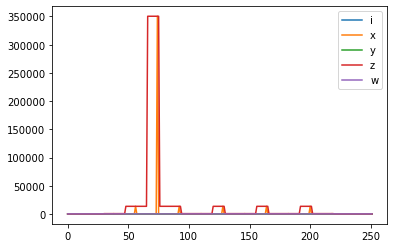

In [631]:
# puzzle 1
s = str(dic_rout[0][-1][0])
print(dic_rout[0][-1])
tp_last = dic_rout[0][-1]
for i in range(1,14):
    for j in range(len(dic_rout[i])):
        tp = dic_rout[i][-1 -1*j]
        if tp[2] == tp_last[1]:
            print(tp)
            s += str(tp[0])
            tp_last = tp
            break

print(s) #98998519596997
x,y,z,w,ls_out = alu(s, day24)
pd.DataFrame(ls_out).plot()

(3, 13, 0)
(1, 355, 13)
(5, 9235, 355)
(2, 240125, 9235)
(1, 9235, 240125)
(1, 355, 9235)
(1, 9242, 355)
(9, 355, 9242)
(1, 9247, 355)
(5, 355, 9247)
(1, 9246, 355)
(4, 355, 9246)
(2, 13, 355)
(1, 0, 13)
31521119151421


<AxesSubplot:>

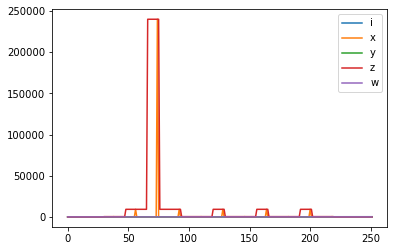

In [632]:
# puzzle 2

s = str(dic_rout[0][0][0])
print(dic_rout[0][0])
tp_last = dic_rout[0][0]
for i in range(1,14):
    for j in range(len(dic_rout[i])):
        tp = dic_rout[i][j]
        if tp[2] == tp_last[1]:
            print(tp)
            s += str(tp[0])
            tp_last = tp
            break

print(s) #31521119151421
x,y,z,w,ls_out = alu(s, day24)
pd.DataFrame(ls_out).plot()

<h1>Day 25</h1>

In [571]:
def read_cuc(txt):
    myfile = open(f'data/{txt}.txt', "rt") # open lorem.t'x't for reading te'x't
    contents = myfile.read()         # read the entire file to string
    myfile.close()                   # close the file 
    day25 = contents.split('\n')
    return [[char for char in s] for s in day25]


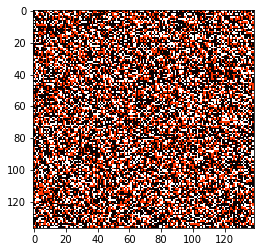

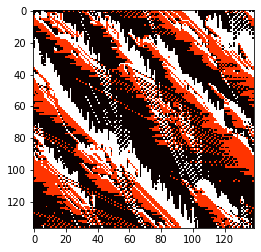

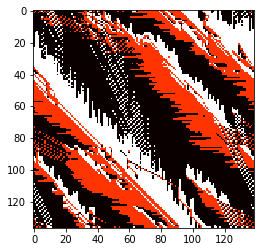

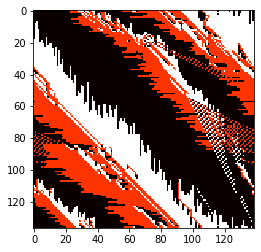

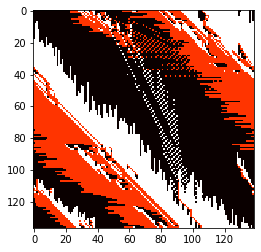

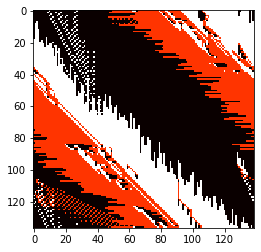

507

In [660]:
import numpy as np
import matplotlib.pyplot as plt

def print_mt(mt):
    col = len(mt)
    row = len(mt[0])
    for i in range(col):
        s = ''
        for j in range(row):
            s+= mt[i][j]
        print(s)

def cucumber_madness(old_cuc):
    new_cuc = [old for old in old_cuc]
    col = len(new_cuc)
    row = len(new_cuc[0])
    remember_right = []
    for i in range(col):
        for j in range(row):
            if new_cuc[i][j] == '>' and new_cuc[i][(j+1)%row] == '.':
                remember_right.append([i,j])
    for right in remember_right:
        new_cuc[right[0]][(right[1]+1)%row] = '>'
        new_cuc[right[0]][right[1]] = '.'
    
    remember_left = []
    for i in range(col):
        for j in range(row):
            if new_cuc[i][j] == 'v' and new_cuc[(i+1)%col][j] == '.':
                remember_left.append([i,j])
    for left in remember_left:
        new_cuc[(left[0]+1)%col][left[1]] = 'v'
        new_cuc[left[0]][left[1]] = '.'

def get_last_round(cuc):
    #print('round ', 0)
    #print_mt(cuc)
    idx = True
    r = 0
    k = 1
    while idx:
        r+=1
        last_cuc = [[c for c in s] for s in cuc]
        cucumber_madness(cuc)
        if last_cuc==cuc:
            idx = False
            #print('round ', r)
            #print('cuc')
            #print_mt(cuc)
            #print('last_cuc')
            #print_mt(last_cuc)
        last_cuc_mtrx = []
        for s in cuc:
            ls = []
            for c in s:
                if c=='.':
                    x = 1
                if c=='>':
                    x = 5
                if c=='v':
                    x = 10
                ls.append(x)
            last_cuc_mtrx.append(ls)
        mtrx = np.array(last_cuc_mtrx)
        if r % (75*k)==1:
            k+=1
            plt.imshow(mtrx, cmap='hot', interpolation='nearest')
            plt.show()
    return r

#get_last_round(read_cuc('day25_ex2'))

get_last_round(read_cuc('day25'))

